<a href="https://colab.research.google.com/github/fabriziobasso/Closet_Index_Tracking/blob/master/File_00_Clusters_ext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<h1 align="center"><font color='#001ddd'> GLUCOSE PREDICTION DATASET**</font></h1>

## **Dataset Description**
The dataset is from a study that collected data from young adults in the UK with type 1 diabetes, who used a continuous glucose monitor (CGM), an insulin pump and a smartwatch. These devices collected blood glucose readings, insulin dosage, carbohydrate intake, and activity data. The data collected was aggregated to five-minute intervals and formatted into samples. Each sample represents a point in time and includes the aggregated five-minute intervals from the previous six hours. The aim is to predict the blood glucose reading an hour into the future, for each of these samples.

The training set takes samples from the first three months of study data from nine of the participants and includes the future blood glucose value. These training samples appear in chronological order and overlap. The testing set takes samples from the remainder of the study period from fifteen of the participants (so unseen participants appear in the testing set). These testing samples do not overlap and are in a random order to avoid data leakage.

**Complexities to be aware of:**

This is medical data so there are missing values and noise in the data
the participants did not all use the same device models (CGM, insulin pump and smartwatch) so there may be differences in the collection method of the data
some participants in the test set do not appear in the training set

In [1]:
%%capture
# Connect to Colab:#
from google.colab import drive
import os
drive.mount('/content/drive')

!pip install category-encoders
!pip install optuna
!pip install optuna-integration
#!pip install scikit-learn==1.4
!pip install catboost
!pip install deeptables

!pip install keras-tuner --upgrade
!pip install keras-nlp
!pip install BorutaShap
!pip install scikit-lego
!!pip install --no-index -U --find-links=/kaggle/input/deeptables-v0-2-5/deeptables-0.2.5 deeptables==0.2.5

In [2]:
folder_script = models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose"
os.chdir(folder_script)

In [3]:
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.wrapper import PolynomialWrapper
from category_encoders.count import CountEncoder

# Setup notebook
from pathlib import Path
import ipywidgets as widgets
import pandas as pd
import numpy as np
from pickle import load, dump
import json
import joblib
#import calplot as cal
import missingno as msno
import category_encoders as ce
import random

# Graphic Libraries:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)


# Bloomberg
#from xbbg import blp
from catboost import CatBoostRegressor, Pool
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from xgboost.callback import EarlyStopping

import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

# Time Management
from tqdm import tqdm
from datetime import date
from datetime import datetime
from pandas.tseries.offsets import BMonthEnd, QuarterEnd
import datetime
from pandas.tseries.offsets import BDay # BDay is business day, not birthday...
import datetime as dt
import click
import glob
import os
import gc
import re
import string

from ipywidgets import AppLayout
from ipywidgets import Dropdown, Layout, HTML, AppLayout, VBox, Label, HBox, BoundedFloatText, interact, Output

#from my_func import *

import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour

os.environ["KERAS_BACKEND"] = "tensorflow"

import tensorflow as tf
import keras
from keras import ops
from keras import layers

from keras.layers import Input, LSTM, Dense, Lambda, RepeatVector, Reshape
from keras.models import Model
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError

from keras.utils import FeatureSpace, plot_model

# Import libraries for Hypertuning
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch, GridSearch, BayesianOptimization

#from my_func import *

# preprocessing modules
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate, GroupKFold, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

# metrics
import sklearn
from sklearn.metrics import (mean_squared_error,
                             root_mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss,
                             make_scorer)

# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  HuberRegressor,
                                  TweedieRegressor,
                                  QuantileRegressor,
                                  ARDRegression,
                                  TheilSenRegressor,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.ensemble import (AdaBoostRegressor,
                              AdaBoostClassifier,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              HistGradientBoostingRegressor,
                              ExtraTreesClassifier)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

import seaborn as sns
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from sklearn.multioutput import RegressorChain
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

import itertools
import warnings
import logging
from openpyxl import load_workbook

import statsmodels.api as sm
from pylab import rcParams
import scipy.stats as ss

warnings.filterwarnings('ignore')
#plt.style.use('fivethirtyeight')

# Setting rc parameters in seaborn for plots and graphs-
# Reference - https://matplotlib.org/stable/tutorials/introductory/customizing.html:-
# To alter this, refer to matplotlib.rcParams.keys()

sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.5,
         'grid.alpha'           :0.5,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : 'black',
         'axes.titlesize'       : 12,
         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
# Set Style
mpl.rcParams['figure.dpi'] = 120;

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 100);
pd.set_option('display.max_rows', 50);

sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


<Figure size 960x660 with 0 Axes>

In [4]:
def seed_everything(seed,
                    tensorflow_init=True,
                    pytorch_init=False):
    """
    Seeds basic parameters for reproducibility of results
    """
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    if tensorflow_init is True:
        tf.random.set_seed(seed)
        keras.utils.set_random_seed(812)
    if pytorch_init is True:
        torch.manual_seed(seed)
        torch.cuda.manual_seed(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False


seed_everything(42)

## 1.0 Functions:

In [5]:
def encode_target(y_train, y_test, encoder_type='label', enc_strategy=False):
    """
    Encodes the target columns in the training and testing data
    using the specified encoder type.

    Parameters:
    y_train (pd.Series or pd.DataFrame): Training target data.
    y_test (pd.Series or pd.DataFrame): Testing target data.

    Returns:
    y_train_encoded (pd.Series): Encoded training target data.
    y_test_encoded (pd.Series): Encoded testing target data.
    """

    if encoder_type == 'label':
        encoder = LabelEncoder()
        y_train_encoded = encoder.fit_transform(y_train)
        y_test_encoded = encoder.transform(y_test)

        y_train_encoded = pd.Series(y_train_encoded, index=y_train.index, name="Target")
        y_test_encoded = pd.Series(y_test_encoded, index=y_test.index, name="Target")


    elif encoder_type == 'onehot':
        y_train_ = y_train.values.reshape(-1, 1)
        y_test_ = y_test.values.reshape(-1, 1)

        encoder = OneHotEncoder(sparse_output=False)
        y_train_encoded = encoder.fit_transform(y_train_)
        y_test_encoded = encoder.transform(y_test_)

        y_train_encoded = pd.DataFrame(y_train_encoded, index=y_train.index)
        y_test_encoded = pd.DataFrame(y_test_encoded, index=y_test.index)

    else:
        raise ValueError("Invalid encoder_type. Currently supported: 'label'.")

    if enc_strategy:
        return y_train_encoded, y_test_encoded, encoder

    else:
        return y_train_encoded, y_test_encoded

def encode_data(X_train, X_test, encoder_type='label', columns=None, map=None):
    """
    Encodes the training and testing data using the specified encoder type.

    Parameters:
    X_train (pd.DataFrame): Training data.
    X_test (pd.DataFrame): Testing data.
    encoder_type (str): Type of encoder ('label' or 'onehot'). Default is 'label'.
    columns (list): List of columns to encode. If None, all object type columns are encoded.

    Returns:
    X_train_encoded (pd.DataFrame): Encoded training data.
    X_test_encoded (pd.DataFrame): Encoded testing data.
    """

    if columns is None:
        # Default to all object type columns if no columns are specified
        columns = X_train.select_dtypes(include=['object']).columns.tolist()

    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()

    if encoder_type == 'label':
        for col in columns:
            le = LabelEncoder()
            X_train_encoded[col] = le.fit_transform(X_train[col])
            X_test_encoded[col] = le.transform(X_test[col])

    elif encoder_type == 'onehot':
        for col in columns:
            ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
            # Fit the encoder on the training data and transform both training and test data
            encoded_train = ohe.fit_transform(X_train[[col]])
            encoded_test = ohe.transform(X_test[[col]])

            # Create a DataFrame with the encoded data
            encoded_train_df = pd.DataFrame(encoded_train, columns=ohe.get_feature_names_out([col]))
            encoded_test_df = pd.DataFrame(encoded_test, columns=ohe.get_feature_names_out([col]))

            # Concatenate the new columns to the original dataframes and drop the original columns
            X_train_encoded = pd.concat([X_train_encoded.drop(col, axis=1), encoded_train_df], axis=1)
            X_test_encoded = pd.concat([X_test_encoded.drop(col, axis=1), encoded_test_df], axis=1)

    elif encoder_type == 'count_encoder':

          for col in columns:

                target_encoder = CountEncoder(cols=columns)
                X_train_encoded = target_encoder.fit_transform(X_train_encoded)
                X_test_encoded = target_encoder.transform(X_test_encoded)

    else:
        raise ValueError("Invalid encoder_type. Currently supported: 'label', 'onehot', 'target_encoder'.")

    return X_train_encoded, X_test_encoded

## **Importing the Dataset**

## **Files**
* activities.txt - a list of activity names that appear in the activity-X:XX columns
* sample_submission.csv - a sample submission file in the correct format
* test.csv - the test set
* train.csv - the training set

## **Columns**
* train.csv:
    * **id - row id** consisting of participant number and a count for that participant
    * **p_num** - participant number
    * **time** - time of day in the format HH:MM:SS
    * **bg-X:XX** - blood glucose reading in mmol/L, X:XX(H:SS) time in the past (e.g. bg-2:35, would be the blood glucose reading from 2 hours and 35 minutes before the time value for that row), recorded by the continuous glucose monitor
    * **insulin-X:XX** - total insulin dose received in units in the last 5 minutes, X:XX(H:SS) time in the past (e.g. insulin-2:35, would be the total insulin dose received between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the insulin pump
    * **carbs-X:XX** - total carbohydrate value consumed in grammes in the last 5 minutes, X:XX(H:SS) time in the past (e.g. carbs-2:35, would be the total carbohydrate value consumed between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the participant
    * **hr-X:XX** - mean heart rate in beats per minute in the last 5 minutes, X:XX(H:SS) time in the past (e.g. hr-2:35, would be the mean heart rate between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the smartwatch
    * **steps-X:XX** - total steps walked in the last 5 minutes, X:XX(H:SS) time in the past (e.g. * steps-2:35, would be the total steps walked between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the smartwatch
    * **cals-X:XX** - total calories burnt in the last 5 minutes, X:XX(H:SS) time in the past (e.g. cals-2:35, would be the total calories burned between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), calculated by the smartwatch
    * **activity-X:XX** - self-declared activity performed in the last 5 minutes, X:XX(H:SS) time in the past (e.g. activity-2:35, would show a string name of the activity performed between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), set on the smartwatch
    * **bg+1:00** - blood glucose reading in mmol/L an hour in the future, this is the value you will be predicting (not provided in test.csv)

In [6]:
colx = ['steps_av0','steps_av1','steps_av2','steps_av3','steps_av4','steps_av5','steps_av6','steps_av7','steps_av8','steps_av9','steps_av10','steps_av11','steps_av12','steps_av13','steps_av14',
        'steps_av15','steps_av16','steps_av17','steps_av18','steps_av19','steps_av20','steps_av21','steps_av22','steps_av23','steps_av24','steps_av25','steps_av26','steps_av27','steps_av28','steps_av29','steps_av30','steps_av31',
        'insulin_av0','insulin_av1','insulin_av2','insulin_av3','insulin_av4','insulin_av5','insulin_av6','insulin_av7','insulin_av8','insulin_av9','insulin_av10','insulin_av11',
        'insulin_av12','insulin_av13','insulin_av14','insulin_av15','insulin_av16','insulin_av17','insulin_av18','insulin_av19','insulin_av20','insulin_av21','insulin_av22','insulin_av23','insulin_av24','insulin_av25','insulin_av26',
        'insulin_av27','insulin_av28','insulin_av29','insulin_av30','insulin_av31','activity0','activity1','activity2','activity3','activity4','activity5','activity6','activity7','activity8','activity9','activity10',
        'activity11','activity12','activity13','activity14','activity15','activity16','activity17','activity18','activity19','activity20','activity21','activity22','activity23','activity24','activity25',
        'activity26','activity27','activity28','activity29','activity30','activity31','cals_av0','cals_av1','cals_av2','cals_av3','cals_av4','cals_av5','cals_av6','cals_av7','cals_av8','cals_av9',
        'cals_av10','cals_av11','cals_av12','cals_av13','cals_av14','cals_av15','cals_av16','cals_av17','cals_av18','cals_av19','cals_av20','cals_av21','cals_av22','cals_av23','cals_av24','cals_av25','cals_av26','cals_av27','cals_av28','cals_av29','cals_av30','cals_av31',
        'brake0','brake1','brake2','brake3','brake4','brake5','brake6','brake7','brake8','brake9','brake10','brake11','brake12','brake13',
        'brake14','brake15','brake16','brake17','brake18','brake19','brake20','brake21','brake22','brake23','brake24','brake25','brake26','brake27','brake28','brake29','brake30','brake31',
        'carbs_av0','carbs_av1','carbs_av2','carbs_av3','carbs_av4','carbs_av5','carbs_av6','carbs_av7','carbs_av8','carbs_av9','carbs_av10','carbs_av11','carbs_av12','carbs_av13','carbs_av14','carbs_av15','carbs_av16',
        'carbs_av17','carbs_av18','carbs_av19','carbs_av20','carbs_av21','carbs_av22','carbs_av23','carbs_av24','carbs_av25','carbs_av26','carbs_av27','carbs_av28','carbs_av29','carbs_av30','carbs_av31',
        'bg0','bg1','bg2','bg3','bg4','bg5','bg6','bg7','bg8','bg9','bg10','bg11','bg12','bg13','bg14','bg15','bg16','bg17','bg18','bg19','bg20','bg21','bg22','bg23','bg24','bg25','bg26','bg27','bg28','bg29','bg30','bg31',
        'hr0','hr1','hr2','hr3','hr4','hr5','hr6','hr7','hr8','hr9','hr10','hr11','hr12','hr13','hr14','hr15','hr16','hr17','hr18','hr19','hr20','hr21','hr22','hr23','hr24','hr25','hr26','hr27','hr28','hr29','hr30','hr31',
        'intake0','intake1','intake2','intake3','intake4','intake5','intake6','intake7','intake8','intake9','intake10','intake11','intake12','intake13','intake14',
        'intake15','intake16','intake17','intake18','intake19','intake20','intake21','intake22','intake23','intake24','intake25','intake26','intake27','intake28','intake29','intake30','intake31']

dict_colx = {i:np.float32 for i in colx}


colx = {'minute': np.int32, 'hour': np.int32, 'p_num': str, 'bg0': np.float32, 'bg1': np.float32, 'bg2': np.float32, 'bg3': np.float32, 'bg4': np.float32, 'bg5': np.float32, 'bg6': np.float32, 'bg7': np.float32, 'bg8': np.float32, 'bg9': np.float32, 'bg10': np.float32,
        'bg11': np.float32, 'bg12': np.float32, 'bg13': np.float32, 'bg14': np.float32, 'bg15': np.float32, 'bg16': np.float32, 'bg17': np.float32, 'bg18': np.float32, 'bg19': np.float32, 'bg20': np.float32, 'bg21': np.float32, 'bg22': np.float32, 'bg23': np.float32, 'bg24': np.float32, 'bg25': np.float32,
        'bg26': np.float32, 'bg27': np.float32, 'bg28': np.float32, 'bg29': np.float32, 'bg30': np.float32, 'bg31': np.float32, 'bg+1:00': np.float32, 'insulin_av0': np.float32, 'insulin_av1': np.float32, 'insulin_av2': np.float32, 'insulin_av3': np.float32, 'insulin_av4': np.float32, 'insulin_av5': np.float32,
        'insulin_av6': np.float32, 'insulin_av7': np.float32, 'insulin_av8': np.float32, 'insulin_av9': np.float32, 'insulin_av10': np.float32, 'insulin_av11': np.float32, 'insulin_av12': np.float32, 'insulin_av13': np.float32, 'insulin_av14': np.float32, 'insulin_av15': np.float32, 'insulin_av16': np.float32, 'insulin_av17': np.float32,
        'insulin_av18': np.float32, 'insulin_av19': np.float32, 'insulin_av20': np.float32, 'insulin_av21': np.float32, 'insulin_av22': np.float32, 'insulin_av23': np.float32, 'insulin_av24': np.float32, 'insulin_av25': np.float32, 'insulin_av26': np.float32, 'insulin_av27': np.float32, 'insulin_av28': np.float32,
        'insulin_av29': np.float32, 'insulin_av30': np.float32, 'insulin_av31': np.float32, 'carbs_av0': np.float32, 'carbs_av1': np.float32, 'carbs_av2': np.float32, 'carbs_av3': np.float32, 'carbs_av4': np.float32, 'carbs_av5': np.float32, 'carbs_av6': np.float32, 'carbs_av7': np.float32, 'carbs_av8': np.float32, 'carbs_av9': np.float32,
        'carbs_av10': np.float32, 'carbs_av11': np.float32, 'carbs_av12': np.float32, 'carbs_av13': np.float32, 'carbs_av14': np.float32, 'carbs_av15': np.float32, 'carbs_av16': np.float32, 'carbs_av17': np.float32, 'carbs_av18': np.float32, 'carbs_av19': np.float32, 'carbs_av20': np.float32, 'carbs_av21': np.float32, 'carbs_av22': np.float32, 'carbs_av23': np.float32, 'carbs_av24': np.float32,
        'carbs_av25': np.float32, 'carbs_av26': np.float32, 'carbs_av27': np.float32, 'carbs_av28': np.float32, 'carbs_av29': np.float32, 'carbs_av30': np.float32, 'carbs_av31': np.float32, 'cals_av0': np.float32, 'cals_av1': np.float32, 'cals_av2': np.float32, 'cals_av3': np.float32, 'cals_av4': np.float32, 'cals_av5': np.float32, 'cals_av6': np.float32,
        'cals_av7': np.float32, 'cals_av8': np.float32, 'cals_av9': np.float32, 'cals_av10': np.float32, 'cals_av11': np.float32, 'cals_av12': np.float32, 'cals_av13': np.float32, 'cals_av14': np.float32, 'cals_av15': np.float32, 'cals_av16': np.float32, 'cals_av17': np.float32, 'cals_av18': np.float32,
        'cals_av19': np.float32, 'cals_av20': np.float32, 'cals_av21': np.float32, 'cals_av22': np.float32, 'cals_av23': np.float32, 'cals_av24': np.float32, 'cals_av25': np.float32, 'cals_av26': np.float32, 'cals_av27': np.float32, 'cals_av28': np.float32, 'cals_av29': np.float32, 'cals_av30': np.float32,
        'cals_av31': np.float32, 'intake_av0': np.float32, 'intake_av1': np.float32, 'intake_av2': np.float32, 'intake_av3': np.float32, 'intake_av4': np.float32, 'intake_av5': np.float32, 'intake_av6': np.float32,'intake_av7': np.float32, 'intake_av8': np.float32, 'intake_av9': np.float32,
        'intake_av10': np.float32, 'intake_av11': np.float32, 'intake_av12': np.float32, 'intake_av13': np.float32, 'intake_av14': np.float32, 'intake_av15': np.float32, 'intake_av16': np.float32, 'intake_av17': np.float32, 'intake_av18': np.float32, 'intake_av19': np.float32,
        'intake_av20': np.float32, 'intake_av21': np.float32, 'intake_av22': np.float32, 'intake_av23': np.float32, 'intake_av24': np.float32, 'intake_av25': np.float32, 'intake_av26': np.float32, 'intake_av27': np.float32, 'intake_av28': np.float32, 'intake_av29': np.float32,
        'intake_av30': np.float32, 'intake_av31': np.float32, 'brake0': np.float32, 'brake1': np.float32, 'brake2': np.float32, 'brake3': np.float32, 'brake4': np.float32, 'brake5': np.float32, 'brake6': np.float32, 'brake7': np.float32, 'brake8': np.float32, 'brake9': np.float32,
        'brake10': np.float32, 'brake11': np.float32, 'brake12': np.float32, 'brake13': np.float32, 'brake14': np.float32, 'brake15': np.float32, 'brake16': np.float32, 'brake17': np.float32, 'brake18': np.float32, 'brake19': np.float32, 'brake20': np.float32,
        'brake21': np.float32, 'brake22': np.float32, 'brake23': np.float32, 'brake24': np.float32, 'brake25': np.float32, 'brake26': np.float32, 'brake27': np.float32, 'brake28': np.float32, 'brake29': np.float32, 'brake30': np.float32, 'brake31': np.float32}

#dict_colx = {i:np.float32 for i in colx}

In [7]:
# df_train=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0, dtype=colx)
# df_test=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_test_scaled.csv", index_col=0, dtype=colx)

# df_test.shape

In [8]:
gc.collect()

4

In [9]:
# df_train.p_num.unique()

In [10]:
# df_train.head(5)

In [11]:
# df_train.info()
# df_train.columns

In [12]:
#df_all = pd.concat([df_train,df_test])

## Group the Data:

Data are scaled in groups.

In [13]:
# static_fields = ["p_num","minute","hour"] #"id",
# target = ["bg+1:00"]
# ts_fields = list(df_train.drop(columns=static_fields+target))

In [14]:
#target_scaler = StandardScaler()
#df_train["bg+1:00"] = target_scaler.fit_transform(df_train[target])

In [15]:
#ts_fields

Sub-dataset are created for each main set of features to inpute missing values:

In [16]:
# # Select columns containing the word "bg"
# bg_col_train = df_train.filter(regex='bg|time|p_num|hour|minute')
# bg_col_test = df_test.filter(regex='bg|time|p_num|hour|minute')

# hr_col_train = df_train.filter(regex='hr|time|p_num|bg+1:00|hour|minute')
# hr_col_test = df_test.filter(regex='hr|time|p_num|bg+1:00|hour|minute')
# hr_col_train["bg+1:00"] = df_train["bg+1:00"]

# step_col_train = df_train.filter(regex='steps|time|p_num|bg+1:00|hour|minute')
# step_col_test = df_test.filter(regex='steps|time|p_num|bg+1:00|hour|minute')
# step_col_train["bg+1:00"] = df_train["bg+1:00"]

# cal_col_train = df_train.filter(regex='cal|time|p_num|bg+1:00|hour|minute')
# cal_col_test = df_test.filter(regex='cal|time|p_num|bg+1:00|hour|minute')
# cal_col_train["bg+1:00"] = df_train["bg+1:00"]

# act_col_train = df_train.filter(regex='activity|time|p_num|bg+1:00|hour|minute')
# act_col_test = df_test.filter(regex='activity|time|p_num|bg+1:00|hour|minute')
# act_col_train["bg+1:00"] = df_train["bg+1:00"]

### Outliers

#### Insuline

In [17]:
# insulin_col_train = df_train.filter(regex='insulin')
# insulin_col_test = df_test.filter(regex='insulin')
# #insulin_col_train["bg+1:00"] = df_train["bg+1:00"]

# ins_sub = insulin_col_train[['insulin_av5', 'insulin_av4','insulin_av3',
#                              'insulin_av2', 'insulin_av1','insulin_av0']]

In [18]:
# plt.boxplot(insulin_col_train)
# plt.show()

The -5 value seems suspicious

In [19]:
#list(insulin_col_train.columns)

In [20]:
# all_ins =  ['insulin_av0','insulin_av1', 'insulin_av2', 'insulin_av3', 'insulin_av4', 'insulin_av5', 'insulin_av6', 'insulin_av7', 'insulin_av8', 'insulin_av9',
#             'insulin_av10', 'insulin_av11', 'insulin_av12', 'insulin_av13', 'insulin_av14', 'insulin_av15', 'insulin_av16', 'insulin_av17', 'insulin_av18', 'insulin_av19', 'insulin_av20',
#             'insulin_av21', 'insulin_av22', 'insulin_av23', 'insulin_av24', 'insulin_av25', 'insulin_av26', 'insulin_av27', 'insulin_av28', 'insulin_av29', 'insulin_av30', 'insulin_av31']

In [21]:
# obs_index = set()

# for c in all_ins:
#   suspicius = insulin_col_train[insulin_col_train[c]==insulin_col_train[all_ins].min().min()]
#   new_ind = set(suspicius.index)
#   obs_index = obs_index.union(new_ind)

# print(len(obs_index))
# obs_index = list(obs_index)

In [22]:
# insulin_col_train.loc[obs_index,all_ins]

- The analysis has highlighted some negative values for insuline. As a result the File *File_01_EDA* has been reviewed to remove all the negative values.

#### Carb

In [23]:
# carb_col_train = df_train.filter(regex='carbs_av')
# carb_col_test = df_test.filter(regex='carbs_av')
# #carb_col_train["bg+1:00"] = df_train["bg+1:00"]

In [24]:
# print(carb_col_train.shape,carb_col_test.shape)

In [25]:
# plt.boxplot(carb_col_train)
# plt.show()

# Features Engeneering:

In [ ]:
# insulin_col_train = df_train.filter(regex='insulin|bg+1:00')
# insulin_col_test = df_test.filter(regex='insulin|bg+1:00')
# insulin_col_train["bg+1:00"] = df_train["bg+1:00"]

In [ ]:
# ins_subset_train = insulin_col_train[['insulin_av12','insulin_av31', 'bg+1:00']].copy()
# ins_subset_train["Delta_past"] = ins_subset_train['insulin_av31'] - ins_subset_train['insulin_av12']
# #ins_subset_train["Delta_fut"] = ins_subset_train['bg+1:00'] - ins_subset_train['bg-0:00']
# ins_subset_train.isnull().sum()

In [ ]:
# ins_subset_train.plot(kind="scatter",x="insulin_av31",y="bg+1:00",alpha=0.7)
# plt.xlabel("-0:00")
# plt.ylabel("-1:00")
# plt.show()

## **CLUSTERS**

In [ ]:
# cols = ['bg0','bg1','bg2','bg3','bg4','bg5','bg6','bg7','bg8','bg9','bg10','bg11','bg12','bg13','bg14','bg15',
#         'bg16','bg17','bg18','bg19','bg20','bg21','bg22','bg23','bg24','bg25','bg26','bg27','bg28','bg29','bg30','bg31']

# # Train dataframe:
# bg_col_train["mean_bg"] = bg_col_train[cols].mean(axis=1)
# bg_col_train["std_bg"] = bg_col_train[cols].std(axis=1)
# bg_col_train["med_bg"] = bg_col_train[cols].median(axis=1)
# bg_col_train["skew_bg"] = bg_col_train[cols].skew(axis=1)
# bg_col_train["curtosis_bg"] = bg_col_train[cols].kurtosis(axis=1)
# # test dataframe:
# bg_col_test["mean_bg"] = bg_col_test[cols].mean(axis=1)
# bg_col_test["std_bg"] = bg_col_test[cols].std(axis=1)
# bg_col_test["med_bg"] = bg_col_test[cols].median(axis=1)
# bg_col_test["skew_bg"] = bg_col_test[cols].skew(axis=1)
# bg_col_test["curtosis_bg"] = bg_col_test[cols].kurtosis(axis=1)

# # Select Relevant Features
# cluster_df_train = bg_col_train[["mean_bg","std_bg","skew_bg","curtosis_bg"]].copy()
# cluster_df_test = bg_col_test[["mean_bg","std_bg","skew_bg","curtosis_bg"]].copy()

# scaler = StandardScaler()
# cluster_df_train = pd.DataFrame(scaler.fit_transform(cluster_df_train), columns=cluster_df_train.columns, index=cluster_df_train.index)
# cluster_df_test = pd.DataFrame(scaler.transform(cluster_df_test), columns=cluster_df_test.columns, index=cluster_df_test.index)

In [ ]:
# cluster_df_train.sample(5)

In [ ]:
# cluster_df_train.shape

#### K-Means

In [ ]:
# # extra code – this cell generates and saves Figure 9–8

# kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(cluster_df_train)
#                 for k in range(1, 10)]
# inertias = [model.inertia_ for model in kmeans_per_k]

# plt.figure(figsize=(8, 3.5))
# plt.plot(range(1, 10), inertias, "bo-")
# plt.xlabel("$k$")
# plt.ylabel("Inertia")
# plt.show()

#### BayesianGaussianMixture

In [ ]:
# from sklearn.mixture import GaussianMixture
# from sklearn.mixture import BayesianGaussianMixture
# from sklearn.metrics import silhouette_score

# gms_per_k = [GaussianMixture(n_components=k, n_init=4, random_state=42).fit(cluster_df_train)
#              for k in tqdm(range(2, 10))]
# bics = [model.bic(cluster_df_train) for model in gms_per_k]
# aics = [model.aic(cluster_df_train) for model in gms_per_k]

In [ ]:
# plt.figure(figsize=(8, 3))
# plt.plot(range(2, 10), bics, "bo-", label="BIC")
# plt.plot(range(2, 10), aics, "go--", label="AIC")
# plt.xlabel("$k$")
# plt.ylabel("Information Criterion")
# plt.axis([1, 10.5, min(aics) - 50, max(bics) + 50])
# plt.legend()

# plt.show()

In [ ]:
# id_train = set(bg_col_train.p_num.unique())
# id_test = set(bg_col_test.p_num.unique())

# id_train.union(id_test)

In [ ]:
# bgm = GaussianMixture(n_components=5, n_init=6, random_state=42)
# bgm.fit(cluster_df_train)

# df_train["cluster"] = bgm.predict(cluster_df_train)
# df_test["cluster"] = bgm.predict(cluster_df_test)

In [ ]:
gc.collect()

In [ ]:
# to_merge = df_train.groupby(["p_num","hour","minute"], as_index=False)["bg+1:00"].agg(["mean","std","skew"])

# df_train = pd.merge(df_train, to_merge, on=["p_num","hour","minute"], how="left")
# df_test = pd.merge(df_test, to_merge, on=["p_num","hour","minute"], how="left")

In [ ]:
# df_train.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster.csv")
# df_test.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster.csv")

In [ ]:
# df_train.drop(["cluster",	"p_num",	"hour",	"minute",	"obv_n","bg+1:00"], axis=1).mean(axis=0).max(),df_train.drop(["cluster",	"p_num",	"hour",	"minute",	"obv_n","bg+1:00"], axis=1).std(axis=0).max()

In [ ]:
# df_train.drop(["cluster",	"p_num",	"hour",	"minute",	"obv_n","bg+1:00"], axis=1).mean(axis=0).min(),df_train.drop(["cluster",	"p_num",	"hour",	"minute",	"obv_n","bg+1:00"], axis=1).std(axis=0).min()

In [ ]:
# df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster.csv", index_col=0)
# df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster.csv", index_col=0)

# display(df_train.sample(3))
# display(df_test.sample(3))

## PCA Based Clusters:

In [ ]:
# cols_bg = ['bg0','bg1','bg2','bg3','bg4','bg5','bg6','bg7','bg8','bg9','bg10','bg11','bg12','bg13','bg14','bg15',
#            'bg16','bg17','bg18','bg19','bg20','bg21','bg22','bg23','bg24','bg25','bg26','bg27','bg28','bg29','bg30','bg31']

# gc.collect()

In [ ]:
# pca = PCA(n_components=3)

# train_pca_df = df_train[cols_bg]
# test_pca_df = df_test[cols_bg]

# train_pca_df_ = pca.fit_transform(train_pca_df)
# test_pca_df_ = pca.transform(test_pca_df)

In [ ]:
# print("Explained Variance: {} - {}".format(np.sum(pca.explained_variance_ratio_),pca.explained_variance_ratio_))

# cols_df = ["PC_{}".format(i) for i in range(1, len(pca.explained_variance_ratio_) + 1)]
# bg_pca_train = pd.DataFrame(train_pca_df_, columns=cols_df, index=train_pca_df.index)
# bg_pca_test = pd.DataFrame(test_pca_df_, columns=cols_df, index=test_pca_df.index)

# bg_pca_train["bg+1:00"] = df_train["bg+1:00"]
# train_pca_df["bg+1:00"] = df_train["bg+1:00"]

In [ ]:
# bg_pca_train.head()

* **Check Correlation:**

In [ ]:
# fig, axs = plt.subplots(1, 2, figsize=(12, 3))

# train_pca_df.corr()["bg+1:00"][:-1].plot(ax=axs[0])
# bg_pca_train.corr()["bg+1:00"][:-1].plot(ax=axs[1])

In [ ]:
# fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# sns.scatterplot(data=bg_pca_train, x="PC_1", y="PC_3", ax=axs[0], hue="bg+1:00")
# sns.histplot(data=bg_pca_train, x="bg+1:00", ax=axs[1])

# plt.show()

In [ ]:
# cluster_df_train = bg_pca_train.drop("bg+1:00", axis=1).copy()

In [ ]:
# kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(cluster_df_train)
#                 for k in range(1, 22)]
# inertias = [model.inertia_ for model in kmeans_per_k]

In [ ]:
# plt.figure(figsize=(8, 3.5))
# plt.plot(range(1, 22), inertias, "bo-")
# plt.xlabel("$k$")
# plt.ylabel("Inertia")
# plt.show()

##### Add to Dataset:

In [ ]:
# df_train.shape

In [ ]:
# bgm = KMeans(n_clusters=4, n_init=10, random_state=42)
# bgm.fit(bg_pca_train.drop("bg+1:00", axis=1))

# df_train["cluster_pca"] = bgm.predict(bg_pca_train.drop("bg+1:00", axis=1))
# df_test["cluster_pca"] = bgm.predict(bg_pca_test)
# df_train.shape, df_test.shape

In [ ]:
# df_train.groupby(["cluster_pca"])["bg-0:00"].agg(["mean","std","skew","median","count"])

In [ ]:
# df_train = pd.concat([df_train,bg_pca_train.loc[:,["PC_1",	"PC_2",	"PC_3"]]], axis=1)
# df_test = pd.concat([df_test,bg_pca_test.loc[:,["PC_1",	"PC_2",	"PC_3"]]], axis=1)
# df_train.head()

In [ ]:
# df_test.shape, df_train.shape

In [ ]:
# df_train.shape,df_test.shape

In [ ]:
# int_cols = df_train.select_dtypes(include=['int']).columns.tolist()
# float_cols = df_train.select_dtypes(include=['float']).columns.tolist()
# obj_cols = df_train.select_dtypes(include=['object']).columns.tolist()

# df_train[int_cols] = df_train[int_cols].astype("int32")
# df_train[float_cols] = df_train[float_cols].astype("float32")
# df_train[obj_cols] = df_train[obj_cols].astype("string")

# df_test[int_cols] = df_test[int_cols].astype("int32")
# df_test[float_cols] = df_test[float_cols].astype("float32")
# df_test[obj_cols] = df_test[obj_cols].astype("string")

In [ ]:
# df_train.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_pca_final.csv", index=False)
# df_test.reset_index().to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_pca_final.csv", index=False)

In [26]:
gc.collect()

0

In [27]:
df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_pca_final.csv", dtype=colx)
df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_pca_final.csv", index_col=0, dtype=colx)

In [28]:
int_cols = df_train.select_dtypes(include=['int']).columns.tolist()
float_cols = df_train.select_dtypes(include=['float']).columns.tolist()
obj_cols = df_train.select_dtypes(include=['object']).columns.tolist()

df_train[int_cols] = df_train[int_cols].astype("int32")
df_train[float_cols] = df_train[float_cols].astype("float32")
df_train[obj_cols] = df_train[obj_cols].astype("string")

df_test[int_cols] = df_test[int_cols].astype("int32")
df_test[float_cols] = df_test[float_cols].astype("float32")
df_test[obj_cols] = df_test[obj_cols].astype("string")

In [29]:
static_fields = ["p_num","minute","hour"] #"id",
target = ["bg+1:00"]
ts_fields = list(df_train.drop(columns=static_fields+target))

In [30]:
df_train.shape,df_test.shape

((5235699, 202), (3644, 202))

In [31]:
df_test.head(3)

,p_num,minute,hour,intake_av0,intake_av1,intake_av2,intake_av3,intake_av4,intake_av5,intake_av6,intake_av7,intake_av8,intake_av9,intake_av10,intake_av11,intake_av12,intake_av13,intake_av14,intake_av15,intake_av16,intake_av17,intake_av18,intake_av19,intake_av20,intake_av21,intake_av22,intake_av23,intake_av24,intake_av25,intake_av26,intake_av27,intake_av28,intake_av29,intake_av30,intake_av31,bg0,bg1,bg2,bg3,bg4,bg5,bg6,bg7,bg8,bg9,bg10,bg11,bg12,bg13,bg14,...,brake21,brake22,brake23,brake24,brake25,brake26,brake27,brake28,brake29,brake30,brake31,insulin_av0,insulin_av1,insulin_av2,insulin_av3,insulin_av4,insulin_av5,insulin_av6,insulin_av7,insulin_av8,insulin_av9,insulin_av10,insulin_av11,insulin_av12,insulin_av13,insulin_av14,insulin_av15,insulin_av16,insulin_av17,insulin_av18,insulin_av19,insulin_av20,insulin_av21,insulin_av22,insulin_av23,insulin_av24,insulin_av25,insulin_av26,insulin_av27,insulin_av28,insulin_av29,insulin_av30,insulin_av31,bg+1:00,mean,std,skew,PC_1,PC_2,PC_3
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,p01,45,6,0.690611,0.621683,0.573915,0.539140,0.514258,0.494275,0.464331,0.455889,0.449646,0.445106,0.439715,0.451322,0.445319,0.421665,0.416207,0.411282,0.406753,0.38974,0.398481,0.394726,0.391238,0.387939,0.384795,0.369058,0.358553,0.355714,0.353019,0.358080,0.368751,0.385461,0.363944,0.302768,1.202320,1.302430,1.435908,1.536073,1.636156,1.736349,1.836547,1.836697,1.803627,1.803851,1.837263,1.837451,1.870952,1.937650,2.037790,...,0.404208,0.403307,0.392066,0.380376,0.370984,0.361903,0.355066,0.348119,0.344107,0.362377,-0.618923,-0.33726,-0.398601,-0.454001,-0.502164,-0.543015,-0.580055,-0.614992,-0.647838,-0.679060,-0.709286,-0.738492,-0.791641,-0.897681,0.373867,0.329672,0.289140,0.251128,0.215981,0.215971,0.215950,0.215926,0.215901,0.215865,0.208176,0.200093,0.191872,0.183917,0.165558,0.156140,0.149888,0.174583,-1.124958,NaN,9.826735,4.257014,0.177129,8.022696,-2.240386,-1.731280
1,p01,25,11,-1.838083,-1.819140,-1.614944,-1.583831,1.195724,1.015928,0.911270,0.793828,0.558722,0.548178,0.524525,0.468596,0.361374,0.378265,0.324846,0.168113,0.139210,0.16135,0.166802,0.015714,0.013768,0.140900,-0.183424,0.106463,0.166283,-0.272465,-0.656227,0.471626,-0.369670,-0.937648,-1.118780,-1.331938,0.336953,0.470229,0.403795,0.337319,0.270798,0.104352,-0.028836,-0.195363,-0.361939,-0.561876,-0.728483,-0.861834,-0.961882,-1.095206,-1.161947,...,-0.007039,-0.030548,-1.371902,-1.277859,-1.303318,-1.400893,-0.222292,-0.542656,-0.766915,-0.889160,-1.054592,-0.33726,-0.398601,-0.454001,-0.502164,-0.593795,1.627949,1.413949,1.225598,1.054353,0.888841,0.731364,0.630550,0.562032,0.498054,0.442985,0.394006,0.352488,0.314641,0.314629,0.314608,0.314582,0.314556,0.320085,-1.306316,-1.230694,-1.170765,-1.078259,0.335221,0.363503,0.370261,0.370197,0.370126,NaN,7.755960,3.725821,1.226621,-4.096652,-2.312943,2.012731
2,p01,45,14,0.690611,-0.440290,-0.632364,-0.755062,-0.875601,-1.173212,-1.315875,-1.505366,-1.660913,-1.649515,-1.517430,-1.408827,-1.380776,-1.369596,-1.248384,-1.280617,-1.170640,-0.82085,-0.196840,-0.238618,-0.315789,-0.815245,-1.145092,-1.441775,-1.535847,-1.725869,-1.646621,-1.454788,-1.221007,-1.171566,-1.114202,-1.072644,-1.127516,-1.194171,-1.161020,-1.094527,-1.061259,-1.061360,-1.061458,-1.061487,-1.061584,-1.028358,-1.028376,-1.028457,-0.995210,-0.995222,-1.061956,...,-1.028929,-1.323199,-1.569585,-1.670033,-1.865663,-1.779518,-1.576280,-1.392108,-1.346728,-1.295520,-1.254360,-0.33726,-0.398601,-0.454001,-0.502164,-0.543015,-0.580055,-0.614992,-0.647838,-0.679060,-0.709286,-0.738492,-0.795259,-0.833000,-0.868582,-0.903602,-0.936486,-0.968472,-0.998900,-1.007710,-1.016797,-1.025181,-1.033716,-1.042291,-1.051179,-1.059672,-1.067954,-1.076581,-1.085790,-1.108094,-1.108127,-1.108151,-1.108205,NaN,9.427587,3.620447,0.543059,-4.482042,2.060656,0.854011


## Encoder Based Clusters:

In [ ]:
# df_train.groupby("p_num")["bg+1:00"].agg(["count"])

In [ ]:
cols_bg = ['bg0','bg1','bg2','bg3','bg4','bg5','bg6','bg7','bg8','bg9','bg10','bg11','bg12','bg13','bg14','bg15',
           'bg16','bg17','bg18','bg19','bg20','bg21','bg22','bg23','bg24','bg25','bg26','bg27','bg28','bg29','bg30','bg31']

X_enc = df_train[["p_num"]+cols_bg]
y_enc = df_train["bg+1:00"]
X_enc_test = df_test[cols_bg]
X_enc.shape

In [ ]:
X_enc.isnull().sum().sum(), y_enc.isna().sum()
#y_enc[:10]

In [ ]:
X_enc.shape

In [ ]:
X_enc_train, X_enc_valid, y_enc_train, y_enc_valid = train_test_split(X_enc, y_enc, test_size=0.2, random_state=42, stratify=X_enc["p_num"])

In [ ]:
# p1_val = list(X_enc[(X_enc["p_num"]=="p01")&(X_enc["obv_n"]>=150_000)].index)
# p2_val = list(X_enc[(X_enc["p_num"]=="p02")&(X_enc["obv_n"]>=300_000)].index)
# p3_val = list(X_enc[(X_enc["p_num"]=="p03")&(X_enc["obv_n"]>=40_000)].index)
# p4_val = list(X_enc[(X_enc["p_num"]=="p04")&(X_enc["obv_n"]>=245_000)].index)
# p5_val = list(X_enc[(X_enc["p_num"]=="p05")&(X_enc["obv_n"]>=160_000)].index)
# p6_val = list(X_enc[(X_enc["p_num"]=="p06")&(X_enc["obv_n"]>=105_000)].index)
# p10_val = list(X_enc[(X_enc["p_num"]=="p10")&(X_enc["obv_n"]>=237_000)].index)
# p11_val = list(X_enc[(X_enc["p_num"]=="p11")&(X_enc["obv_n"]>=22000)].index)
# p12_val = list(X_enc[(X_enc["p_num"]=="p12")&(X_enc["obv_n"]>=22500)].index)

# matrix_val = p1_val+p2_val+p3_val+p4_val+p5_val+p6_val+p10_val+p11_val+p12_val
# len(matrix_val)/X_enc.shape[0]

# X_enc_train = X_enc.drop(matrix_val)
# X_enc_valid = X_enc.loc[matrix_val]

# y_enc_train = y_enc.drop(matrix_val)
# y_enc_valid = y_enc.loc[matrix_val]

X_enc_train.drop(["p_num"], axis=1, inplace=True)
X_enc_valid.drop(["p_num"], axis=1, inplace=True)
X_enc.drop(["p_num"], axis=1, inplace=True)

X_enc_train.shape, X_enc_valid.shape, X_enc.shape, y_enc_train.shape, y_enc_valid.shape, y_enc.shape

In [ ]:
# Assuming your data is in a NumPy array called 'data'
train = X_enc_train.values.reshape((-1, 32, 1))  # Reshape for LSTM
valid = X_enc_valid.values.reshape((-1, 32, 1))
X_enc = X_enc.values.reshape((-1, 32, 1))
X_enc_test = X_enc_test.values.reshape((-1, 32, 1))

y_enc_train = y_enc_train.values.reshape((-1, 1))
y_enc_valid = y_enc_valid.values.reshape((-1, 1))

In [ ]:
X_enc_train.shape

#### MODEL 1

In [ ]:
def model_autoencoder_v1():
  input_dim = 32
  latent_vec_dim = 2

  # 2. Build the autoencoder model
  input_ts = keras.Input(shape=(input_dim, 1))

  # Encoder
#  x = layers.LSTM(64, activation='relu', return_sequences=True)(input_ts)
  x = layers.LSTM(32, return_sequences=True)(input_ts) #(x)
  x = layers.LSTM(16)(x)
  encoded = layers.Dense(latent_vec_dim, activation='linear', kernel_regularizer = tf.keras.regularizers.L2(l2=0.1))(x)

  output_1 = Dense(1, activation='linear', name="Reg_Output")(encoded)

  #encoder = encoded

  # Decoder
  x = layers.RepeatVector(input_dim)(encoded)
  x = layers.LSTM(16, return_sequences=True)(x)
  x = layers.LSTM(32, return_sequences=True)(x) #, return_sequences=True
#  x = layers.LSTM(64, activation='relu', return_sequences=True)(x)

  decoded = layers.Dense(1, name="decoded")(x)

  # Connect both encoder and decoder
  autoencoder_mult = Model(inputs = input_ts, outputs = [decoded, output_1], name="Deep_Autoencoder")

  # Latent representation (Optional)
  latent_model = Model(input_ts, encoded)

  return autoencoder_mult, latent_model

In [ ]:
autoencoder_prellin_v1, latent_model_prellin_v1 = model_autoencoder_v1()

# Get summary
autoencoder_prellin_v1.summary()

In [ ]:
lr = keras.callbacks.ReduceLROnPlateau(monitor="val_Reg_Output_rmse",
                        factor=0.75,
                        patience=10,
                        verbose=1,
                        mode="min")

early_stop = keras.callbacks.EarlyStopping(monitor="val_Reg_Output_rmse",
                            patience=25,
                            verbose=1,
                            mode="min",
                            restore_best_weights=True)

##################################################################### Relevant Folders
folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Glucose/encoder_01_ext/"
##################################################################### Generate and Fit Model
# Callbacks:
checkpoint_filepath = folders_experiment + f'checkpoint/best_weights_v1.weights.h5'

Checkpoint = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                 save_weights_only=True,
                                                 monitor="val_Reg_Output_rmse",
                                                 mode='min')

In [ ]:
# Compile the autoencoder model
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
loss_0 = 'mse'
loss_1 = 'mse'

autoencoder_prellin_v1.compile(loss=[loss_0, loss_1], loss_weights=[0.7,0.30], optimizer=optimizer, metrics={'decoded': 'mse','Reg_Output': RootMeanSquaredError(name="rmse")})

# Train the autoencoder with MNIST data
history_prellin_v1 = autoencoder_prellin_v1.fit(train, [train, y_enc_train], epochs=120, batch_size=512, callbacks = [early_stop, Checkpoint, lr],
                                                 shuffle=True, validation_data=(valid, [valid, y_enc_valid]))

autoencoder_prellin_v1.load_weights(checkpoint_filepath)

In [ ]:
autoencoder_prellin_v1.load_weights(checkpoint_filepath)

In [ ]:
# Plot training and validation loss scores
# against the number of epochs.
plt.figure(figsize=(5, 3))
plt.plot(history_prellin_v1.history['Reg_Output_rmse'], label='Train')
plt.plot(history_prellin_v1.history['val_Reg_Output_rmse'], label='Validation')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

In [ ]:
history_prellin_v1.history.keys()

In [ ]:
latent_representation_v1 = latent_model_prellin_v1.predict(valid, batch_size=512)
latent_representation_train_v1 = latent_model_prellin_v1.predict(train, batch_size=512)

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v1[:,0],
                y=latent_representation_v1[:,1],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v1[:,0],
                y=latent_representation_train_v1[:,1],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Encoder first dimension")
axs[0].set_ylabel("Encoder second dimension")

axs[1].set_xlabel("Encoder first dimension")
axs[1].set_ylabel("Encoder second dimension")

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
latent_representation_v1_final = latent_model_prellin_v1.predict(X_enc)
latent_representation_v1_final_test = latent_model_prellin_v1.predict(X_enc_test)

In [ ]:
X_enc.shape

In [ ]:
#latent_representation_v2_final

In [ ]:
model_version=1
for i in range(latent_representation_v1_final.shape[1]):
  df_train["enc_0{}_v{}".format(i, model_version)] = latent_representation_v1_final[:,i]
  df_test["enc_0{}_v{}".format(i, model_version)] = latent_representation_v1_final_test[:,i]

In [ ]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum(), df_train.shape, df_test.shape

##### STORE ENCODED FEATURES from Model 1:

In [ ]:
df_train.sample()

In [ ]:
df_test.sample()

In [ ]:
df_train.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v1_ext.csv",index=True)
df_test.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v1_ext.csv",index=True)

#df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v1.csv", index_col=0)
#df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v1.csv", index_col=0)

In [ ]:
gc.collect()

##### Submission Model 1:

In [ ]:
recons, pred = autoencoder_prellin_v1.predict(X_enc_test)
_, pred_train = autoencoder_prellin_v1.predict(X_enc, batch_size=512)
#pred = y_test_pred

In [ ]:
df_train_scaled=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)
df_test.shape

In [ ]:
target_scaler = StandardScaler()
target_scaler.fit(df_train_scaled["bg+1:00"].values.reshape(-1, 1))

In [ ]:
pred_resc = target_scaler.inverse_transform(pred.reshape(-1,1))
pred_resc_train = target_scaler.inverse_transform(pred_train.reshape(-1,1))

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")
sub.shape

In [ ]:
sub["bg+1:00"] = pred_resc
pred_resc_train = pd.DataFrame(data=pred_resc_train, index=df_train.index, columns=["bg+1:00"])

In [ ]:
sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_encoder_v1_ext.csv", index=False)
pred_resc_train.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/train_encoder_v1_ext.csv")

In [ ]:
del latent_model_prellin_v1, autoencoder_prellin_v1, latent_representation_v1
gc.collect()

#### MODEL 2

In [ ]:
def model_autoencoder_v2():
  input_dim = 32
  latent_vec_dim = 3

  # 2. Build the autoencoder model
  input_ts = keras.Input(shape=(input_dim, 1))

  # Encoder
  x = layers.LSTM(64, return_sequences=True)(input_ts)
  x = layers.LSTM(32, return_sequences=True)(input_ts) #(x)
  x = layers.LSTM(16)(x)
  encoded = layers.Dense(latent_vec_dim, activation='linear', kernel_regularizer = tf.keras.regularizers.L2(l2=0.1))(x)

  output_1 = Dense(1, activation='linear', name="Class_Output")(encoded)

  #encoder = encoded

  # Decoder
  x = layers.RepeatVector(72)(encoded)
  x = layers.LSTM(16, return_sequences=True)(x)
  x = layers.LSTM(32, return_sequences=True)(x) #, return_sequences=True
  x = layers.LSTM(64, return_sequences=True)(x)

  decoded = layers.Dense(1, name="Deep_Autoencoder")(x)

  # Connect both encoder and decoder
  autoencoder_mult = Model(inputs = input_ts, outputs = [decoded, output_1])

  # Latent representation (Optional)
  latent_model = Model(input_ts, encoded)

  return autoencoder_mult, latent_model

In [ ]:
autoencoder_prellin_v2, latent_model_prellin_v2 = model_autoencoder_v2()

# Get summary
autoencoder_prellin_v2.summary()

In [ ]:
lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                        factor=0.75,
                        patience=10,
                        verbose=1,
                        mode="min")

early_stop = keras.callbacks.EarlyStopping(monitor="val_loss",
                            patience=25,
                            verbose=1,
                            mode="min",
                            restore_best_weights=True)


##################################################################### Relevant Folders
folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Glucose/encoder_02/"
##################################################################### Generate and Fit Model
# Callbacks:
checkpoint_filepath = folders_experiment + f'checkpoint/best_weights_v2.weights.h5'

Checkpoint = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                 save_weights_only=True,
                                                 monitor="val_loss",
                                                 mode='min')

In [ ]:
# Compile the autoencoder model
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
loss_0 = 'mse'
loss_1 = 'mse'

autoencoder_prellin_v2.compile(loss=[loss_0, loss_1], loss_weights=[0.75,0.25], optimizer=optimizer, metrics={'Deep_Autoencoder': 'mse','Class_Output': RootMeanSquaredError()})

# Train the autoencoder with MNIST data
#history_prellin_v2 = autoencoder_prellin_v2.fit(train, [train, y_enc_train], epochs=120, batch_size=256, callbacks = [early_stop, Checkpoint, lr],
#                                                 shuffle=True, validation_data=(valid, [valid, y_enc_valid]))

autoencoder_prellin_v2.load_weights(checkpoint_filepath)

In [ ]:
# Plot training and validation loss scores
# against the number of epochs.
plt.figure(figsize=(5, 3))
plt.plot(history_prellin_v2.history['loss'], label='Train')
plt.plot(history_prellin_v2.history['val_loss'], label='Validation')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

In [ ]:
latent_representation_v2 = latent_model_prellin_v2.predict(valid)
latent_representation_train_v2 = latent_model_prellin_v2.predict(train)

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v2[:,0],
                y=latent_representation_v2[:,1],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v2[:,0],
                y=latent_representation_train_v2[:,1],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Encoder first dimension")
axs[0].set_ylabel("Encoder second dimension")

axs[1].set_xlabel("Encoder first dimension")
axs[1].set_ylabel("Encoder second dimension")

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v2[:,0],
                y=latent_representation_v2[:,2],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v2[:,0],
                y=latent_representation_train_v2[:,2],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Encoder first dimension")
axs[0].set_ylabel("Encoder second dimension")

axs[1].set_xlabel("Encoder first dimension")
axs[1].set_ylabel("Encoder second dimension")

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
latent_representation_v2_final = latent_model_prellin_v2.predict(X_enc)
latent_representation_v2_final_test = latent_model_prellin_v2.predict(X_enc_test)

In [ ]:
X_enc.shape

In [ ]:
#latent_representation_v2_final

In [ ]:
model_version=2
for i in range(latent_representation_v2_final.shape[1]):
  df_train["enc_0{}_v{}".format(i, model_version)] = latent_representation_v2_final[:,i]
  df_test["enc_0{}_v{}".format(i, model_version)] = latent_representation_v2_final_test[:,i]

In [ ]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum(), df_train.shape, df_test.shape

##### STORE ENCODED FEATURES from Model 2:

In [ ]:
#df_train.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v2.csv")
#df_test.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v2.csv")

df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v2.csv", index_col=0)
df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v2.csv", index_col=0)

##### Test Correlations:

In [ ]:
df_train[['PC_1', 'PC_2', 'PC_3', 'enc_00_v1','enc_01_v1', 'enc_00_v2', 'enc_01_v2', 'enc_02_v2',"bg+1:00"]].corr().style.background_gradient(cmap='viridis')

##### Submission Model 2:

In [ ]:
recons, pred = autoencoder_prellin_v2.predict(X_enc_test)
_, pred_train = autoencoder_prellin_v2.predict(X_enc)

In [ ]:
df_train_scaled=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)
df_test.shape

In [ ]:
target_scaler = StandardScaler()
target_scaler.fit(df_train_scaled["bg+1:00"].values.reshape(-1, 1))

In [ ]:
pred_resc = target_scaler.inverse_transform(pred.reshape(-1,1))
pred_resc_train = target_scaler.inverse_transform(pred_train.reshape(-1,1))

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")
sub.shape

In [ ]:
sub["bg+1:00"] = pred_resc
pred_resc_train = pd.DataFrame(data=pred_resc_train, index=df_train.index, columns=["bg+1:00"])

In [ ]:
sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_encoder_v2.csv", index=False)
pred_resc_train.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/train_encoder_v2.csv")

#### MODEL 3

In [ ]:
cols_bg = ['bg-5:55', 'bg-5:50', 'bg-5:45', 'bg-5:40','bg-5:35', 'bg-5:30',
           'bg-5:25', 'bg-5:20', 'bg-5:15', 'bg-5:10','bg-5:05', 'bg-5:00',
           'bg-4:55', 'bg-4:50', 'bg-4:45', 'bg-4:40','bg-4:35', 'bg-4:30',
           'bg-4:25', 'bg-4:20', 'bg-4:15', 'bg-4:10','bg-4:05', 'bg-4:00',
           'bg-3:55', 'bg-3:50', 'bg-3:45', 'bg-3:40','bg-3:35', 'bg-3:30',
           'bg-3:25', 'bg-3:20', 'bg-3:15', 'bg-3:10','bg-3:05', 'bg-3:00',
           'bg-2:55', 'bg-2:50', 'bg-2:45', 'bg-2:40','bg-2:35', 'bg-2:30',
           'bg-2:25', 'bg-2:20', 'bg-2:15', 'bg-2:10','bg-2:05', 'bg-2:00',
           'bg-1:55', 'bg-1:50', 'bg-1:45', 'bg-1:40','bg-1:35', 'bg-1:30',
           'bg-1:25', 'bg-1:20', 'bg-1:15', 'bg-1:10','bg-1:05', 'bg-1:00',
           'bg-0:55', 'bg-0:50', 'bg-0:45', 'bg-0:40','bg-0:35', 'bg-0:30',
           'bg-0:25', 'bg-0:20', 'bg-0:15', 'bg-0:10','bg-0:05', 'bg-0:00']

cols_brake = ['brake-5:55', 'brake-5:50', 'brake-5:45', 'brake-5:40','brake-5:35', 'brake-5:30',
              'brake-5:25', 'brake-5:20', 'brake-5:15', 'brake-5:10','brake-5:05', 'brake-5:00',
              'brake-4:55', 'brake-4:50', 'brake-4:45', 'brake-4:40','brake-4:35', 'brake-4:30',
              'brake-4:25', 'brake-4:20', 'brake-4:15', 'brake-4:10','brake-4:05', 'brake-4:00',
              'brake-3:55', 'brake-3:50', 'brake-3:45', 'brake-3:40','brake-3:35', 'brake-3:30',
              'brake-3:25', 'brake-3:20', 'brake-3:15', 'brake-3:10','brake-3:05', 'brake-3:00',
              'brake-2:55', 'brake-2:50', 'brake-2:45', 'brake-2:40','brake-2:35', 'brake-2:30',
              'brake-2:25', 'brake-2:20', 'brake-2:15', 'brake-2:10','brake-2:05', 'brake-2:00',
              'brake-1:55', 'brake-1:50', 'brake-1:45', 'brake-1:40','brake-1:35', 'brake-1:30',
              'brake-1:25', 'brake-1:20', 'brake-1:15', 'brake-1:10','brake-1:05', 'brake-1:00',
              'brake-0:55', 'brake-0:50', 'brake-0:45', 'brake-0:40','brake-0:35', 'brake-0:30',
              'brake-0:25', 'brake-0:20', 'brake-0:15', 'brake-0:10','brake-0:05', 'brake-0:00']


In [ ]:
X_enc = df_train[["p_num","obv_n"]+cols_bg+cols_brake]
y_enc = df_train["bg+1:00"]
X_enc_test = df_test[cols_bg+cols_brake]
X_enc.shape

In [ ]:
X_enc.isnull().sum().sum(), y_enc.isna().sum()
#y_enc[:10]

In [ ]:
p1_val = list(X_enc[(X_enc["p_num"]=="p01")&(X_enc["obv_n"]>=7600)].index)
p2_val = list(X_enc[(X_enc["p_num"]=="p02")&(X_enc["obv_n"]>=22500)].index)
p3_val = list(X_enc[(X_enc["p_num"]=="p03")&(X_enc["obv_n"]>=23000)].index)
p4_val = list(X_enc[(X_enc["p_num"]=="p04")&(X_enc["obv_n"]>=22000)].index)
p5_val = list(X_enc[(X_enc["p_num"]=="p05")&(X_enc["obv_n"]>=7600)].index)
p6_val = list(X_enc[(X_enc["p_num"]=="p06")&(X_enc["obv_n"]>=7600)].index)
p10_val = list(X_enc[(X_enc["p_num"]=="p10")&(X_enc["obv_n"]>=22500)].index)
p11_val = list(X_enc[(X_enc["p_num"]=="p11")&(X_enc["obv_n"]>=22000)].index)
p12_val = list(X_enc[(X_enc["p_num"]=="p12")&(X_enc["obv_n"]>=22500)].index)

matrix_val = p1_val+p2_val+p3_val+p4_val+p5_val+p6_val+p10_val+p11_val+p12_val
len(matrix_val)/X_enc.shape[0]

X_enc_train = X_enc.drop(matrix_val)
X_enc_valid = X_enc.loc[matrix_val]

y_enc_train = y_enc.drop(matrix_val)
y_enc_valid = y_enc.loc[matrix_val]

X_enc_train.drop(["p_num","obv_n"], axis=1, inplace=True)
X_enc_valid.drop(["p_num","obv_n"], axis=1, inplace=True)
X_enc.drop(["p_num","obv_n"], axis=1, inplace=True)

X_enc_train.shape, X_enc_valid.shape, X_enc.shape, y_enc_train.shape, y_enc_valid.shape, y_enc.shape

In [ ]:
# Assuming your data is in a NumPy array called 'data'
train = X_enc_train.values.reshape((-1, 72, 2))  # Reshape for LSTM
valid = X_enc_valid.values.reshape((-1, 72, 2))
X_enc = X_enc.values.reshape((-1, 72, 2))
X_enc_test = X_enc_test.values.reshape((-1, 72, 2))

y_enc_train = y_enc_train.values.reshape((-1, 1))
y_enc_valid = y_enc_valid.values.reshape((-1, 1))

In [ ]:
def model_autoencoder_v3():
  input_dim = 72
  latent_vec_dim = 5

  # 2. Build the autoencoder model
  input_ts = keras.Input(shape=(input_dim, 2))

  # Encoder
  x = layers.LSTM(64, return_sequences=True)(input_ts)
  x = layers.LSTM(32, return_sequences=True)(input_ts) #(x)
  x = layers.LSTM(16)(x)
  encoded = layers.Dense(latent_vec_dim, activation='linear', kernel_regularizer = tf.keras.regularizers.L2(l2=0.1))(x)

  output_1 = Dense(1, activation='linear', name="Reg_Output")(encoded)

  #encoder = encoded

  # Decoder
  x = layers.RepeatVector(72)(encoded)
  x = layers.LSTM(16, return_sequences=True)(x)
  x = layers.LSTM(32, return_sequences=True)(x) #, return_sequences=True
  x = layers.LSTM(64, return_sequences=True)(x)

  decoded = layers.Dense(2, name="decoded")(x)

  # Connect both encoder and decoder
  autoencoder_mult = Model(inputs = input_ts, outputs = [decoded, output_1], name="Deep_Autoencoder")

  # Latent representation (Optional)
  latent_model = Model(input_ts, encoded)

  return autoencoder_mult, latent_model

In [ ]:
autoencoder_prellin_v3, latent_model_prellin_v3 = model_autoencoder_v3()

# Get summary
autoencoder_prellin_v3.summary()

In [ ]:
lr = keras.callbacks.ReduceLROnPlateau(monitor="val_Reg_Output_root_mean_squared_error",
                        factor=0.75,
                        patience=10,
                        verbose=1,
                        mode="min")

early_stop = keras.callbacks.EarlyStopping(monitor="val_Reg_Output_root_mean_squared_error",
                            patience=25,
                            verbose=1,
                            mode="min",
                            restore_best_weights=True)


##################################################################### Relevant Folders
folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Glucose/encoder_03/"
##################################################################### Generate and Fit Model
# Callbacks:
checkpoint_filepath = folders_experiment + f'checkpoint/best_weights_v3.weights.h5'

Checkpoint = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                 save_weights_only=True,
                                                 monitor="val_Reg_Output_root_mean_squared_error",
                                                 mode='min')

In [ ]:
# Compile the autoencoder model
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
loss_0 = 'mse'
loss_1 = 'mse'

autoencoder_prellin_v3.compile(loss=[loss_0, loss_1], loss_weights=[0.75,0.25], optimizer=optimizer, metrics={'decoded': 'mse','Reg_Output': RootMeanSquaredError()})

# Train the autoencoder with MNIST data
#history_prellin_v3 = autoencoder_prellin_v3.fit(train, [train, y_enc_train], epochs=120, batch_size=256, callbacks = [early_stop, Checkpoint, lr],
#                                                 shuffle=True, validation_data=(valid, [valid, y_enc_valid]))

autoencoder_prellin_v3.load_weights(checkpoint_filepath)

In [ ]:
# Plot training and validation loss scores
# against the number of epochs.
plt.figure(figsize=(5, 3))
plt.plot(history_prellin_v3.history['loss'], label='Train')
plt.plot(history_prellin_v3.history['val_loss'], label='Validation')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')
plt.show()

In [ ]:
latent_representation_v3 = latent_model_prellin_v3.predict(valid)
latent_representation_train_v3 = latent_model_prellin_v3.predict(train)

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v3[:,0],
                y=latent_representation_v3[:,1],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v3[:,0],
                y=latent_representation_train_v3[:,1],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Enc. First dimension", fontsize=8)
axs[0].set_ylabel("Enc. Second dimension", fontsize=8)

axs[1].set_xlabel("Enc. First dimension - Train", fontsize=8)
axs[1].set_ylabel("Enc. Second dimension - Train", fontsize=8)

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v3[:,0],
                y=latent_representation_v3[:,2],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v3[:,0],
                y=latent_representation_train_v3[:,2],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Enc. First dimension", fontsize=8)
axs[0].set_ylabel("Enc. Third dimension", fontsize=8)

axs[1].set_xlabel("Enc. First dimension - Train", fontsize=8)
axs[1].set_ylabel("Enc. Third dimension - Train", fontsize=8)

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
latent_representation_v3_final = latent_model_prellin_v3.predict(X_enc)
latent_representation_v3_final_test = latent_model_prellin_v3.predict(X_enc_test)

In [ ]:
X_enc.shape

In [ ]:
latent_representation_v3_final.shape

In [ ]:
df_train["enc_01_v3"] = latent_representation_v3_final[:,0]
df_train["enc_02_v3"] = latent_representation_v3_final[:,1]
df_train["enc_03_v3"] = latent_representation_v3_final[:,2]
df_train["enc_04_v3"] = latent_representation_v3_final[:,3]
df_train["enc_05_v3"] = latent_representation_v3_final[:,4]

df_test["enc_01_v3"] = latent_representation_v3_final_test[:,0]
df_test["enc_02_v3"] = latent_representation_v3_final_test[:,1]
df_test["enc_03_v3"] = latent_representation_v3_final_test[:,2]
df_test["enc_04_v3"] = latent_representation_v3_final_test[:,3]
df_test["enc_05_v3"] = latent_representation_v3_final_test[:,4]

In [ ]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum(), df_train.shape, df_test.shape

##### STORE ENCODED FEATURES from Model 3:

In [ ]:
#df_train.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v3.csv")
#df_test.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v3.csv")

df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v3.csv", index_col=0)
df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v3.csv", index_col=0)

##### Test Correlations:

In [ ]:
df_train[['PC_1', 'PC_2', 'PC_3', 'enc_01_v3', 'enc_02_v3', 'enc_03_v3','enc_04_v3','enc_05_v3',"bg+1:00"]].corr().style.background_gradient(cmap='viridis')

##### Submission Model 3:

In [ ]:
recons, pred = autoencoder_prellin_v3.predict(X_enc_test)
_, pred_train = autoencoder_prellin_v3.predict(X_enc)

In [ ]:
df_train_scaled=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)
df_test.shape

In [ ]:
target_scaler = StandardScaler()
target_scaler.fit(df_train_scaled["bg+1:00"].values.reshape(-1, 1))

In [ ]:
pred_resc = target_scaler.inverse_transform(pred.reshape(-1,1))
pred_resc_train = target_scaler.inverse_transform(pred_train.reshape(-1,1))

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")
sub.shape

In [ ]:
sub["bg+1:00"] = pred_resc
pred_resc_train = pd.DataFrame(data=pred_resc_train, index=df_train.index, columns=["bg+1:00"])

In [ ]:
sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_encoder_v3.csv", index=False)
pred_resc_train.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/train_encoder_v3.csv")

#### MODEL 4

In [ ]:
cols_bg = ['bg0','bg1','bg2','bg3','bg4','bg5','bg6','bg7','bg8','bg9','bg10','bg11','bg12','bg13','bg14',
           'bg15','bg16','bg17','bg18','bg19','bg20','bg21','bg22','bg23','bg24','bg25','bg26','bg27','bg28',
           'bg29','bg30','bg31']

cols_brake = ['brake0','brake1','brake2','brake3','brake4','brake5','brake6','brake7','brake8','brake9','brake10','brake11','brake12','brake13',
              'brake14','brake15','brake16','brake17','brake18','brake19','brake20','brake21','brake22','brake23','brake24','brake25','brake26',
              'brake27','brake28','brake29','brake30','brake31']


In [ ]:
X_enc = df_train[["p_num"]+cols_bg+cols_brake]
y_enc = df_train["bg+1:00"]
X_enc_test = df_test[cols_bg+cols_brake]
X_enc.shape

In [ ]:
X_enc.isnull().sum().sum(), y_enc.isna().sum()
#y_enc[:10]

In [ ]:
# p1_val = list(X_enc[(X_enc["p_num"]=="p01")&(X_enc["obv_n"]>=7600)].index)
# p2_val = list(X_enc[(X_enc["p_num"]=="p02")&(X_enc["obv_n"]>=22500)].index)
# p3_val = list(X_enc[(X_enc["p_num"]=="p03")&(X_enc["obv_n"]>=23000)].index)
# p4_val = list(X_enc[(X_enc["p_num"]=="p04")&(X_enc["obv_n"]>=22000)].index)
# p5_val = list(X_enc[(X_enc["p_num"]=="p05")&(X_enc["obv_n"]>=7600)].index)
# p6_val = list(X_enc[(X_enc["p_num"]=="p06")&(X_enc["obv_n"]>=7600)].index)
# p10_val = list(X_enc[(X_enc["p_num"]=="p10")&(X_enc["obv_n"]>=22500)].index)
# p11_val = list(X_enc[(X_enc["p_num"]=="p11")&(X_enc["obv_n"]>=22000)].index)
# p12_val = list(X_enc[(X_enc["p_num"]=="p12")&(X_enc["obv_n"]>=22500)].index)

# matrix_val = p1_val+p2_val+p3_val+p4_val+p5_val+p6_val+p10_val+p11_val+p12_val
# len(matrix_val)/X_enc.shape[0]

# X_enc_train = X_enc.drop(matrix_val)
# X_enc_valid = X_enc.loc[matrix_val]

# y_enc_train = y_enc.drop(matrix_val)
# y_enc_valid = y_enc.loc[matrix_val]

X_enc_train, X_enc_valid, y_enc_train, y_enc_valid = train_test_split(X_enc, y_enc, test_size=0.2, random_state=42, stratify=X_enc["p_num"])

X_enc_train.drop(["p_num"], axis=1, inplace=True)
X_enc_valid.drop(["p_num"], axis=1, inplace=True)
X_enc.drop(["p_num"], axis=1, inplace=True)

X_enc_train.shape, X_enc_valid.shape, X_enc.shape, y_enc_train.shape, y_enc_valid.shape, y_enc.shape

In [ ]:
# Assuming your data is in a NumPy array called 'data'
train = X_enc_train.values.reshape((-1, 32, 2))  # Reshape for LSTM
valid = X_enc_valid.values.reshape((-1, 32, 2))
X_enc = X_enc.values.reshape((-1, 32, 2))
X_enc_test = X_enc_test.values.reshape((-1, 32, 2))

y_enc_train = y_enc_train.values.reshape((-1, 1))
y_enc_valid = y_enc_valid.values.reshape((-1, 1))

In [ ]:
def model_autoencoder_v4():
  input_dim = 32
  latent_vec_dim = 8

  # 2. Build the autoencoder model
  input_ts = keras.Input(shape=(input_dim, 2))

  # Encoder
  x = layers.LSTM(64, return_sequences=True, name="encode_step1")(input_ts)
  x = layers.LSTM(32, return_sequences=True, name="encode_step2")(x) #(x)
  x = layers.LSTM(16, name="encode_step3")(x)
  encoded = layers.Dense(latent_vec_dim, activation='linear', kernel_regularizer = tf.keras.regularizers.L2(l2=0.1))(x)

  output_1 = Dense(1, activation='linear', name="Reg_Output")(encoded)

  #encoder = encoded

  # Decoder
  x = layers.RepeatVector(input_dim)(encoded)
  x = layers.LSTM(16, name="decoder_step1", return_sequences=True)(x)
  x = layers.LSTM(32,  name="decoder_step2",return_sequences=True)(x) #, return_sequences=True
  x = layers.LSTM(64, return_sequences=True, name="decoder_step3")(x)

  decoded = layers.Dense(2, name="decoded")(x)

  # Connect both encoder and decoder
  autoencoder_mult = Model(inputs = input_ts, outputs = [decoded, output_1], name="Deep_Autoencoder")

  # Latent representation (Optional)
  latent_model = Model(input_ts, encoded)

  return autoencoder_mult, latent_model

In [ ]:
autoencoder_prellin_v4, latent_model_prellin_v4 = model_autoencoder_v4()

# Get summary
autoencoder_prellin_v4.summary()

In [ ]:
lr = keras.callbacks.ReduceLROnPlateau(monitor="val_Reg_Output_rmse",
                        factor=0.75,
                        patience=10,
                        verbose=1,
                        mode="min")

early_stop = keras.callbacks.EarlyStopping(monitor="val_Reg_Output_rmse",
                            patience=25,
                            verbose=1,
                            mode="min",
                            restore_best_weights=True)

##################################################################### Relevant Folders
folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Glucose/encoder_04_ext/"
##################################################################### Generate and Fit Model
# Callbacks:
checkpoint_filepath = folders_experiment + f'checkpoint/best_weights_v4.weights.h5'

Checkpoint = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                 save_weights_only=True,
                                                 monitor="val_Reg_Output_rmse",
                                                 mode='min')

In [ ]:
# Compile the autoencoder model
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
loss_0 = 'mse'
loss_1 = 'mse'

autoencoder_prellin_v4.compile(loss=[loss_0, loss_1], loss_weights=[0.7,0.30], optimizer=optimizer, metrics={'decoded': 'mse','Reg_Output': RootMeanSquaredError(name="rmse")})

# Train the autoencoder with MNIST data
history_prellin_v4 = autoencoder_prellin_v4.fit(train, [train, y_enc_train], epochs=120, batch_size=512, callbacks = [early_stop, Checkpoint, lr],
                                                 shuffle=True, validation_data=(valid, [valid, y_enc_valid]))

In [ ]:
autoencoder_prellin_v4.load_weights(checkpoint_filepath)

In [ ]:
# Plot training and validation loss scores
# against the number of epochs.
plt.figure(figsize=(5, 3))
plt.plot(history_prellin_v4.history['Reg_Output_rmse'], label='Train')
plt.plot(history_prellin_v4.history['val_Reg_Output_rmse'], label='Validation')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')
plt.show()

In [ ]:
latent_representation_v4 = latent_model_prellin_v4.predict(valid, batch_size=512)
latent_representation_train_v4 = latent_model_prellin_v4.predict(train, batch_size=512)

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v4[:,0],
                y=latent_representation_v4[:,1],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v4[:,0],
                y=latent_representation_train_v4[:,1],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Enc. First dimension", fontsize=8)
axs[0].set_ylabel("Enc. Second dimension", fontsize=8)

axs[1].set_xlabel("Enc. First dimension - Train", fontsize=8)
axs[1].set_ylabel("Enc. Second dimension - Train", fontsize=8)

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v4[:,0],
                y=latent_representation_v4[:,2],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v4[:,0],
                y=latent_representation_train_v4[:,2],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Enc. First dimension", fontsize=8)
axs[0].set_ylabel("Enc. Third dimension", fontsize=8)

axs[1].set_xlabel("Enc. First dimension - Train", fontsize=8)
axs[1].set_ylabel("Enc. Third dimension - Train", fontsize=8)

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
latent_representation_v4_final = latent_model_prellin_v4.predict(X_enc, batch_size=512)
latent_representation_v4_final_test = latent_model_prellin_v4.predict(X_enc_test, batch_size=512)

In [ ]:
X_enc.shape

In [ ]:
latent_representation_v4_final.shape

In [ ]:
df_train["enc_01_v4"] = latent_representation_v4_final[:,0]
df_train["enc_02_v4"] = latent_representation_v4_final[:,1]
df_train["enc_03_v4"] = latent_representation_v4_final[:,2]
df_train["enc_04_v4"] = latent_representation_v4_final[:,3]
df_train["enc_05_v4"] = latent_representation_v4_final[:,4]
df_train["enc_06_v4"] = latent_representation_v4_final[:,5]
df_train["enc_07_v4"] = latent_representation_v4_final[:,6]
df_train["enc_08_v4"] = latent_representation_v4_final[:,7]

df_test["enc_01_v4"] = latent_representation_v4_final_test[:,0]
df_test["enc_02_v4"] = latent_representation_v4_final_test[:,1]
df_test["enc_03_v4"] = latent_representation_v4_final_test[:,2]
df_test["enc_04_v4"] = latent_representation_v4_final_test[:,3]
df_test["enc_05_v4"] = latent_representation_v4_final_test[:,4]
df_test["enc_06_v4"] = latent_representation_v4_final_test[:,5]
df_test["enc_07_v4"] = latent_representation_v4_final_test[:,6]
df_test["enc_08_v4"] = latent_representation_v4_final_test[:,7]

In [ ]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum(), df_train.shape, df_test.shape

##### STORE ENCODED FEATURES from Model 4:

In [ ]:
#df_train.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v4_ext.csv")
#df_test.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v4_ext.csv")

df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v4_ext.csv", index_col=0)
df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v4_ext.csv", index_col=0)

##### Test Correlations:

In [ ]:
df_train[['PC_1', 'PC_2', 'PC_3','PC_4', 'enc_01_v4', 'enc_02_v4', 'enc_03_v4','enc_04_v4','enc_05_v4',
          'enc_06_v4','enc_07_v4','enc_08_v4',"bg+1:00"]].corr().style.background_gradient(cmap='viridis')

##### Submission Model 4:

In [ ]:
recons, pred = autoencoder_prellin_v4.predict(X_enc_test, batch_size=512)
_, pred_train = autoencoder_prellin_v4.predict(X_enc, batch_size=512)

In [ ]:
df_train_scaled=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)
df_test.shape

In [ ]:
target_scaler = StandardScaler()
target_scaler.fit(df_train_scaled["bg+1:00"].values.reshape(-1, 1))

In [ ]:
pred_resc = target_scaler.inverse_transform(pred.reshape(-1,1))
pred_resc_train = target_scaler.inverse_transform(pred_train.reshape(-1,1))

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")
sub.shape

In [ ]:
sub["bg+1:00"] = pred_resc
pred_resc_train = pd.DataFrame(data=pred_resc_train, index=df_train.index, columns=["bg+1:00"])

In [ ]:
sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_encoder_v4_ext.csv", index=False)
pred_resc_train.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/train_encoder_v4_ext.csv")

#### MODEL 5 - Convol

In [32]:
cols_bg = ['bg0','bg1','bg2','bg3','bg4','bg5','bg6','bg7','bg8','bg9','bg10','bg11','bg12','bg13','bg14',
           'bg15','bg16','bg17','bg18','bg19','bg20','bg21','bg22','bg23','bg24','bg25','bg26','bg27','bg28',
           'bg29','bg30','bg31']

cols_brake = ['brake0','brake1','brake2','brake3','brake4','brake5','brake6','brake7','brake8','brake9','brake10','brake11','brake12','brake13',
              'brake14','brake15','brake16','brake17','brake18','brake19','brake20','brake21','brake22','brake23','brake24','brake25','brake26',
              'brake27','brake28','brake29','brake30','brake31']

In [33]:
X_enc = df_train[["p_num"]+cols_bg+cols_brake+["mean",	"std",	"skew"]]
y_enc = df_train["bg+1:00"]
X_enc_test = df_test[cols_bg+cols_brake+["mean",	"std",	"skew"]]
X_enc.shape

(5235699, 68)

In [ ]:
X_enc.isnull().sum().sum(), y_enc.isna().sum()
#y_enc[:10]

In [34]:
X_enc_train, X_enc_valid, y_enc_train, y_enc_valid = train_test_split(X_enc, y_enc, test_size=0.2, random_state=42, stratify=X_enc["p_num"])

X_enc_train.drop(["p_num"], axis=1, inplace=True)
X_enc_valid.drop(["p_num"], axis=1, inplace=True)
X_enc.drop(["p_num"], axis=1, inplace=True)

X_enc_train.shape, X_enc_valid.shape, X_enc.shape, y_enc_train.shape, y_enc_valid.shape, y_enc.shape

((4188559, 67),
 (1047140, 67),
 (5235699, 67),
 (4188559,),
 (1047140,),
 (5235699,))

In [ ]:
# # Assuming your data is in a NumPy array called 'data'
# train = X_enc_train.values.reshape((-1, 32, 2))  # Reshape for LSTM
# valid = X_enc_valid.values.reshape((-1, 32, 2))
# X_enc = X_enc.values.reshape((-1, 32, 2))
# X_enc_test = X_enc_test.values.reshape((-1, 32, 2))

# y_enc_train = y_enc_train.values.reshape((-1, 1))
# y_enc_valid = y_enc_valid.values.reshape((-1, 1))

In [36]:
gc.collect()

0

In [35]:
# Assuming your data is in a NumPy array called 'data'
train_0 = X_enc_train.drop(cols_bg+cols_brake,axis=1).values
train_1 = X_enc_train.drop(["mean",	"std",	"skew"],axis=1).values.reshape((-1, 32, 2))  # Reshape for LSTM

valid_0 = X_enc_valid.drop(cols_bg+cols_brake,axis=1).values
valid_1 = X_enc_valid.drop(["mean",	"std",	"skew"],axis=1).values.reshape((-1, 32, 2))

X_enc_0 = X_enc.drop(cols_bg+cols_brake,axis=1).values
X_enc_1 = X_enc.drop(["mean",	"std",	"skew"],axis=1).values.reshape((-1, 32, 2))

X_enc_test_0 = X_enc_test.drop(cols_bg+cols_brake,axis=1).values
X_enc_test_1 = X_enc_test.drop(["mean",	"std",	"skew"],axis=1).values.reshape((-1, 32, 2))

y_enc_train = y_enc_train.values.reshape((-1, 1))
y_enc_valid = y_enc_valid.values.reshape((-1, 1))

In [37]:
def model_autoencoder_v5():
  input_dim = 32
  latent_vec_dim = 8

  # 2. Build the autoencoder model
  input_ts = keras.Input(shape=(input_dim, 2), name="input_1")

  # Encoder
  x = layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_ts)
  x = layers.MaxPooling1D(pool_size=2)(x)
  x = layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.MaxPooling1D(pool_size=2)(x)
  x = layers.Flatten()(x)
  encoded = layers.Dense(latent_vec_dim, activation='linear', kernel_regularizer = tf.keras.regularizers.L2(l2=0.1))(x)  # Bottleneck layer with 5 dimensions

  input_2 = keras.Input(shape=(3,), name="input_2")

  encoded_concat = layers.Concatenate(name="concat_output")([encoded, input_2])

  output_1 = Dense(1, activation='linear', name="Reg_Output")(encoded_concat)

  #encoder = encoded

  # Decoder
  x = layers.Dense(8 * 32)(encoded)  # Adjusted output size
  x = layers.Reshape((8, 32))(x)  # Adjusted reshape
  x = layers.Conv1DTranspose(filters=32, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.UpSampling1D(size=2)(x)
  x = layers.Conv1DTranspose(filters=64, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.UpSampling1D(size=2)(x)
  decoded = layers.Conv1D(filters=2, kernel_size=3, activation='linear', padding='same', name="decoded")(x)


  # Connect both encoder and decoder
  autoencoder_mult = Model(inputs = [input_ts,input_2], outputs = [decoded, output_1], name="Deep_Autoencoder")

  # Latent representation (Optional)
  latent_model = Model([input_ts,input_2], encoded)

  return autoencoder_mult, latent_model

In [38]:
autoencoder_prellin_v5, latent_model_prellin_v5 = model_autoencoder_v5()

# Get summary
autoencoder_prellin_v5.summary()

Model: "Deep_Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)      │ (None, 32, 2)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 32, 64)         │            448 │ input_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 16, 64)         │              0 │ conv1d[0][0]           │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 16, 32)         │          6,176 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_1           │ (None, 8, 32)          │              0 │ conv1d_1[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 256)            │              0 │ max_pooling1d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 8)              │          2,056 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 256)            │          2,304 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 8, 32)          │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_transpose          │ (None, 8, 32)          │          3,104 │ reshape[0][0]          │
│ (Conv1DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling1d             │ (None, 16, 32)         │              0 │ conv1d_transpose[0][0] │
│ (UpSampling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_transpose_1        │ (None, 16, 64)         │          6,208 │ up_sampling1d[0][0]    │
│ (Conv1DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_2 (InputLayer)      │ (None, 3)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling1d_1           │ (None, 32, 64)         │              0 │ conv1d_transpose_1[0]… │
│ (UpSampling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concat_output             │ (None, 11)             │              0 │ dense[0][0],           │
│ (Concatenate)             │                        │                │ input_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ decoded (Conv1D)          │ (None, 32, 2)          │            386 │ up_sampling1d_1[0][0]  │
├──────────────────────

 Total params: 20,694 (80.84 KB)

 Trainable params: 20,694 (80.84 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
lr = keras.callbacks.ReduceLROnPlateau(monitor="val_Reg_Output_rmse",
                        factor=0.75,
                        patience=10,
                        verbose=1,
                        mode="min")

early_stop = keras.callbacks.EarlyStopping(monitor="val_Reg_Output_rmse",
                            patience=25,
                            verbose=1,
                            mode="min",
                            restore_best_weights=True)

##################################################################### Relevant Folders
folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Glucose/encoder_05_ext/"
##################################################################### Generate and Fit Model
# Callbacks:
checkpoint_filepath = folders_experiment + f'checkpoint/best_weights_v5_ter.weights.h5'

Checkpoint = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                 save_weights_only=True,
                                                 monitor="val_Reg_Output_rmse",
                                                 mode='min')

In [40]:
autoencoder_prellin_v5.load_weights(checkpoint_filepath)

In [41]:
##################################################################### Relevant Folders
folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Glucose/encoder_05_ext/"
##################################################################### Generate and Fit Model
# Callbacks:
checkpoint_filepath = folders_experiment + f'checkpoint/best_weights_v5_max.weights.h5'

Checkpoint = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                 save_weights_only=True,
                                                 monitor="val_Reg_Output_rmse",
                                                 mode='min')

In [42]:
# Compile the autoencoder model
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
loss_0 = 'mse'
loss_1 = 'mse'
#autoencoder_prellin_v5.load_weights(checkpoint_filepath)
autoencoder_prellin_v5.compile(loss=[loss_0, loss_1], loss_weights=[0.7,0.30], optimizer=optimizer, metrics={'decoded': 'mse','Reg_Output': RootMeanSquaredError(name="rmse")})

# Train the autoencoder with MNIST data
history_prellin_v5 = autoencoder_prellin_v5.fit([train_1,train_0], [train_1, y_enc_train], epochs=120, batch_size=512, callbacks = [early_stop, Checkpoint, lr],
                                                 shuffle=True, validation_data=([valid_1,valid_0], [valid_1, y_enc_valid]))

autoencoder_prellin_v5.load_weights(checkpoint_filepath)

Epoch 1/120
8181/8181 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - Reg_Output_loss: 1.0811 - Reg_Output_rmse: 1.8984 - decoded_loss: 0.0281 - decoded_mse: 0.0401 - loss: 1.1190 - val_Reg_Output_loss: 1.0919 - val_Reg_Output_rmse: 1.9077 - val_decoded_loss: 0.0274 - val_decoded_mse: 0.0391 - val_loss: 1.1291 - learning_rate: 5.0000e-04
Epoch 2/120
8181/8181 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - Reg_Output_loss: 1.0807 - Reg_Output_rmse: 1.8980 - decoded_loss: 0.0278 - decoded_mse: 0.0398 - loss: 1.1183 - val_Reg_Output_loss: 1.0912 - val_Reg_Output_rmse: 1.9071 - val_decoded_loss: 0.0276 - val_decoded_mse: 0.0394 - val_loss: 1.1288 - learning_rate: 5.0000e-04
Epoch 3/120
8181/8181 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - Reg_Output_loss: 1.0803 - Reg_Output_rmse: 1.8976 - decoded_loss: 0.0281 - decoded_mse: 0.0402 - loss: 1.1183 - val_Reg_Output_loss: 1.0930 - val_Reg_Output_rmse: 1.9087 - val_decoded_loss: 0.0276 - val_decoded_mse: 0.0394 - val_loss: 1.1306 - learning_rate: 5.0000e-04
Epoch 4/120
8181

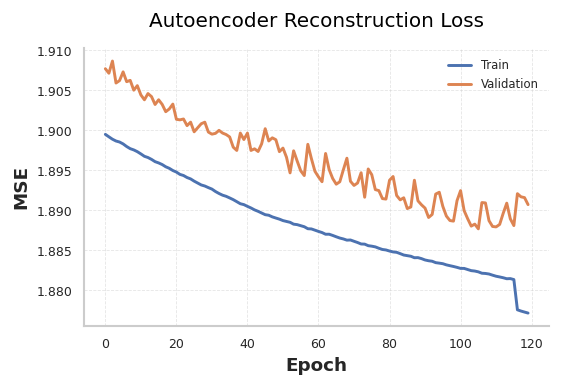

In [43]:
# Plot training and validation loss scores
# against the number of epochs.
plt.figure(figsize=(5, 3))
plt.plot(history_prellin_v5.history['Reg_Output_rmse'], label='Train')
plt.plot(history_prellin_v5.history['val_Reg_Output_rmse'], label='Validation')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')
plt.show()

##### Forecast

In [44]:
latent_representation_v5 = latent_model_prellin_v5.predict([valid_1,valid_0], batch_size=512)
latent_representation_train_v5 = latent_model_prellin_v5.predict([train_1,train_0], batch_size=512)

2046/2046 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
8181/8181 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


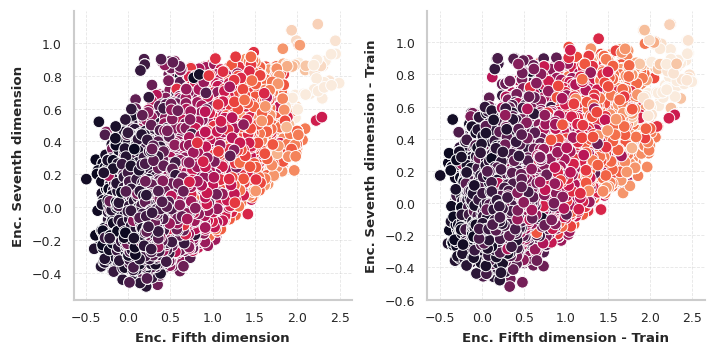

In [45]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v5[:,5],
                y=latent_representation_v5[:,7],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v5[:,5],
                y=latent_representation_train_v5[:,7],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Enc. Fifth dimension", fontsize=8)
axs[0].set_ylabel("Enc. Seventh dimension", fontsize=8)

axs[1].set_xlabel("Enc. Fifth dimension - Train", fontsize=8)
axs[1].set_ylabel("Enc. Seventh dimension - Train", fontsize=8)

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

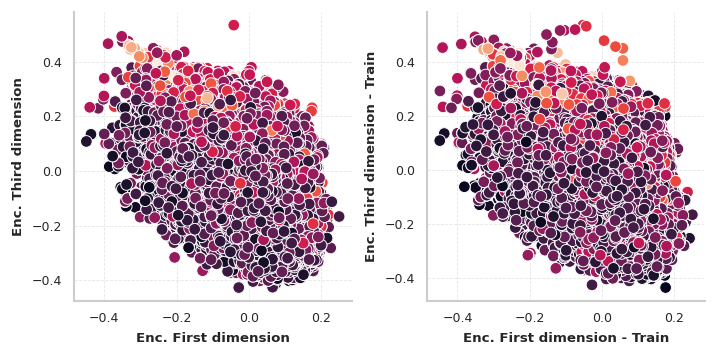

In [46]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v5[:,0],
                y=latent_representation_v5[:,2],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v5[:,0],
                y=latent_representation_train_v5[:,2],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Enc. First dimension", fontsize=8)
axs[0].set_ylabel("Enc. Third dimension", fontsize=8)

axs[1].set_xlabel("Enc. First dimension - Train", fontsize=8)
axs[1].set_ylabel("Enc. Third dimension - Train", fontsize=8)

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [47]:
latent_representation_v5_final = latent_model_prellin_v5.predict([X_enc_1,X_enc_0], batch_size=512)
latent_representation_v5_final_test = latent_model_prellin_v5.predict([X_enc_test_1,X_enc_test_0], batch_size=128)

10226/10226 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [48]:
X_enc_1.shape

(5235699, 32, 2)

In [49]:
latent_representation_v5_final.shape

(5235699, 8)

In [50]:
df_train["enc_01_v5"] = latent_representation_v5_final[:,0]
df_train["enc_02_v5"] = latent_representation_v5_final[:,1]
df_train["enc_03_v5"] = latent_representation_v5_final[:,2]
df_train["enc_04_v5"] = latent_representation_v5_final[:,3]
df_train["enc_05_v5"] = latent_representation_v5_final[:,4]
df_train["enc_06_v5"] = latent_representation_v5_final[:,5]
df_train["enc_07_v5"] = latent_representation_v5_final[:,6]
df_train["enc_08_v5"] = latent_representation_v5_final[:,7]

df_test["enc_01_v5"] = latent_representation_v5_final_test[:,0]
df_test["enc_02_v5"] = latent_representation_v5_final_test[:,1]
df_test["enc_03_v5"] = latent_representation_v5_final_test[:,2]
df_test["enc_04_v5"] = latent_representation_v5_final_test[:,3]
df_test["enc_05_v5"] = latent_representation_v5_final_test[:,4]
df_test["enc_06_v5"] = latent_representation_v5_final_test[:,5]
df_test["enc_07_v5"] = latent_representation_v5_final_test[:,6]
df_test["enc_08_v5"] = latent_representation_v5_final_test[:,7]

In [51]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum(), df_train.shape, df_test.shape

(0, 3644, (5235699, 210), (3644, 210))

##### STORE ENCODED FEATURES from Model 5:

In [52]:
int_cols = df_train.select_dtypes(include=['int']).columns.tolist()
float_cols = df_train.select_dtypes(include=['float']).columns.tolist()
obj_cols = df_train.select_dtypes(include=['object']).columns.tolist()

df_train[int_cols] = df_train[int_cols].astype("int32")
df_train[float_cols] = df_train[float_cols].astype("float32")
df_train[obj_cols] = df_train[obj_cols].astype("string")

df_test[int_cols] = df_test[int_cols].astype("int32")
df_test[float_cols] = df_test[float_cols].astype("float32")
df_test[obj_cols] = df_test[obj_cols].astype("string")

In [53]:
df_train.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v5_ext_final_1.csv")
df_test.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v5_ext_final_1.csv")

#df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v5_ext_final_1.csv", index_col=0)
#df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v5_ext_final_1.csv", index_col=0)

In [54]:
df_train.shape, df_test.shape

((5235699, 210), (3644, 210))

##### Test Correlations:

In [55]:
df_train[['PC_1', 'PC_2', 'PC_3','enc_01_v5', 'enc_02_v5', 'enc_03_v5','enc_04_v5','enc_05_v5',
          'enc_06_v5','enc_07_v5','enc_08_v5',"bg+1:00"]].corr().style.background_gradient(cmap='viridis')

,PC_1,PC_2,PC_3,enc_01_v5,enc_02_v5,enc_03_v5,enc_04_v5,enc_05_v5,enc_06_v5,enc_07_v5,enc_08_v5,bg+1:00
PC_1,1.000000,-0.000000,-0.000000,-0.320010,-0.391532,0.127692,0.258195,0.925229,0.494852,0.588379,0.749304,0.459282
PC_2,-0.000000,1.000000,-0.000000,0.149609,0.369915,0.402857,-0.561368,-0.026157,0.506234,-0.008673,0.291994,0.337899
PC_3,-0.000000,-0.000000,1.000000,0.431962,0.293165,0.163240,0.255473,0.090744,0.300045,-0.096975,0.113476,0.225452
enc_01_v5,-0.320010,0.149609,0.431962,1.000000,0.091883,-0.401419,-0.233229,-0.109522,-0.039774,-0.014871,-0.202940,-0.050168
enc_02_v5,-0.391532,0.369915,0.293165,0.091883,1.000000,0.325491,-0.050948,-0.207178,0.094878,-0.610510,-0.085033,0.005972
enc_03_v5,0.127692,0.402857,0.163240,-0.401419,0.325491,1.000000,-0.442661,-0.023386,0.309675,-0.221987,-0.082901,0.206236
enc_04_v5,0.258195,-0.561368,0.255473,-0.233229,-0.050948,-0.442661,1.000000,0.350903,0.007720,-0.008535,0.462158,0.050795
enc_05_v5,0.925229,-0.026157,0.090744,-0.109522,-0.207178,-0.023386,0.350903,1.000000,0.468633,0.405642,0.746850,0.431568
enc_06_v5,0.494852,0.506234,0.300045,-0.039774,0.094878,0.309675,0.007720,0.468633,1.000000,0.214587,0.601089,0.753000
enc_07_v5,0.588379,-0.008673,-0.096975,-0.014871,-0.610510,-0.221987,-0.008535,0.405642,0.214587,1.000000,0.456871,0.241070


##### Submission Model 5:

In [56]:
recons, pred = autoencoder_prellin_v5.predict([X_enc_test_1,X_enc_test_0])
_, pred_train = autoencoder_prellin_v5.predict([X_enc_1,X_enc_0], batch_size=512)

114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
10226/10226 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


In [57]:
#df_train_scaled=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)
#df_test.shape

In [58]:
#target_scaler = StandardScaler()
#target_scaler.fit(df_train_scaled["bg+1:00"].values.reshape(-1, 1))

In [59]:
#pred_resc = target_scaler.inverse_transform(pred.reshape(-1,1))
#pred_resc_train = target_scaler.inverse_transform(pred_train.reshape(-1,1))

In [60]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")
sub.shape

(3644, 2)

In [61]:
pred.shape

(3644, 1)

In [62]:
sub["bg+1:00"] = pred
pred_resc_train = pd.DataFrame(data=pred_train, index=df_train.index, columns=["bg+1:00"])

In [63]:
sub

,id,bg+1:00
0,p01_8459,8.972283
1,p01_8460,4.080451
2,p01_8461,7.414741
3,p01_8462,12.832700
4,p01_8463,8.030380
...,...,...
3639,p24_256,5.740243
3640,p24_257,8.087121
3641,p24_258,5.833948
3642,p24_259,7.331251


In [64]:
sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_encoder_v5_ext_final_v1.csv", index=False)
pred_resc_train.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/train_encoder_v5_ext_final_v1.csv")

#### MODEL 6 - Convol + Intake

In [67]:
df_train

,p_num,minute,hour,intake_av0,intake_av1,intake_av2,intake_av3,intake_av4,intake_av5,intake_av6,intake_av7,intake_av8,intake_av9,intake_av10,intake_av11,intake_av12,intake_av13,intake_av14,intake_av15,intake_av16,intake_av17,intake_av18,intake_av19,intake_av20,intake_av21,intake_av22,intake_av23,intake_av24,intake_av25,intake_av26,intake_av27,intake_av28,intake_av29,intake_av30,intake_av31,bg0,bg1,bg2,bg3,bg4,bg5,bg6,bg7,bg8,bg9,bg10,bg11,bg12,bg13,bg14,...,brake29,brake30,brake31,insulin_av0,insulin_av1,insulin_av2,insulin_av3,insulin_av4,insulin_av5,insulin_av6,insulin_av7,insulin_av8,insulin_av9,insulin_av10,insulin_av11,insulin_av12,insulin_av13,insulin_av14,insulin_av15,insulin_av16,insulin_av17,insulin_av18,insulin_av19,insulin_av20,insulin_av21,insulin_av22,insulin_av23,insulin_av24,insulin_av25,insulin_av26,insulin_av27,insulin_av28,insulin_av29,insulin_av30,insulin_av31,bg+1:00,mean,std,skew,PC_1,PC_2,PC_3,enc_01_v5,enc_02_v5,enc_03_v5,enc_04_v5,enc_05_v5,enc_06_v5,enc_07_v5,enc_08_v5
0,p01,25,6,0.584296,0.526538,0.487530,0.462656,0.444172,0.436543,0.433961,0.433481,0.432132,0.435577,0.432106,0.417135,0.410887,0.403384,0.393775,0.388017,0.388126,0.385316,0.381327,0.375860,0.351960,0.342384,0.336010,0.331778,0.330333,0.339460,0.344831,0.346883,0.349942,0.342224,0.348601,0.333591,2.234105,2.367646,2.567902,2.768127,2.968214,3.068590,3.202272,3.302445,3.336182,3.336576,3.370047,3.337052,3.270706,3.237445,3.171030,...,-0.508885,-0.517530,-0.539685,-1.140620,-1.205107,-1.300878,-1.127555,-1.059154,-1.008943,-0.990581,-0.991916,-0.998835,-0.996087,-1.009195,-1.024449,-1.040746,-1.057186,-1.074754,-1.092517,-1.110151,-1.128395,-1.045380,-0.991491,-0.919451,-0.919454,-0.919484,-0.919510,-0.919530,-0.919573,-0.919601,-0.955611,-0.972924,-0.990556,-1.008286,-1.025834,12.800000,10.209143,4.378905,0.152038,16.300846,-1.024583,-0.548979,-0.162659,-0.073927,0.165281,0.113159,0.484277,0.743771,0.056617,0.318532
1,p01,5,4,-0.630781,-0.651392,-0.627581,-0.626622,-0.640536,-0.650450,-0.652824,-0.685363,-0.673180,-0.658725,-0.642631,-0.630117,-0.565362,-0.588171,-0.593744,-0.572261,-0.539146,-0.488466,-0.349645,-0.302644,-0.183451,0.121311,0.266877,0.279362,0.292680,0.294173,0.293113,0.292254,0.296715,0.292767,0.284254,0.292573,0.470086,0.470229,0.470383,0.403916,0.370702,0.304188,0.237648,0.204386,0.137807,0.104526,0.071230,0.037927,0.004614,-0.028708,-0.062038,...,-1.252946,-1.263728,-1.248233,-1.140620,-1.205107,-1.300878,-1.375106,-1.433006,-1.488196,-1.543431,-1.596591,-1.648667,-1.699669,-1.749673,-1.798530,-1.846401,-1.892967,-1.938335,-1.983251,-2.027125,-2.069923,-2.069890,-2.069888,-2.069884,-2.069867,-2.069890,-2.069905,-2.069907,-2.069944,-2.069954,-2.069942,-2.069966,-2.069978,-2.069976,-2.070020,17.200001,11.516609,5.142675,0.048461,2.873362,2.182570,2.312540,-0.025538,0.023092,0.191381,0.024975,0.038040,1.048347,-0.079358,0.075449
2,p01,10,4,-0.643158,-0.588990,-0.582417,-0.598533,-0.628178,-0.631188,-0.664592,-0.654298,-0.641473,-0.627203,-0.615798,-0.552156,-0.575375,-0.581772,-0.561385,-0.529536,-0.479912,-0.342466,-0.296029,-0.177566,0.125699,0.270480,0.282525,0.295855,0.297201,0.295972,0.294985,0.299341,0.295391,0.286772,0.294894,0.292573,0.470086,0.470229,0.403795,0.370618,0.304099,0.237576,0.204337,0.137762,0.104491,0.071206,0.037908,0.004603,-0.028713,-0.062036,-0.028707,...,-1.263082,-1.247531,-1.248233,-1.140620,-1.205107,-1.300878,-1.375106,-1.433006,-1.488196,-1.543431,-1.596591,-1.648667,-1.699669,-1.749673,-1.798530,-1.846401,-1.892967,-1.938335,-1.983251,-2.027125,-2.069923,-2.069890,-2.069888,-2.069884,-2.069867,-2.069890,-2.069905,-2.069907,-2.069944,-2.069954,-2.069942,-2.069966,-2.069978,-2.069976,-2.070020,17.500000,11.653757,5.117702,0.002327,3.121872,2.583020,2.287460,-0.018306,0.021842,0.192728,0.019949,0.048668,1.133250,-0.082192,0.097729
3,p01,15,4,-0.490877,-0.510557,-0.542458,-0.581213,-0.608954,-0.642868,-0.633862,-0.622948,-0.610315,-0.600619,-0.538437,-0.562098,-0.569021,-0.549622,-0.518918,-

In [73]:
cols_bg = ['bg0','bg1','bg2','bg3','bg4','bg5','bg6','bg7','bg8','bg9','bg10','bg11','bg12','bg13','bg14',
           'bg15','bg16','bg17','bg18','bg19','bg20','bg21','bg22','bg23','bg24','bg25','bg26','bg27','bg28',
           'bg29','bg30','bg31']

cols_brake = ['brake0','brake1','brake2','brake3','brake4','brake5','brake6','brake7','brake8','brake9','brake10','brake11','brake12','brake13',
              'brake14','brake15','brake16','brake17','brake18','brake19','brake20','brake21','brake22','brake23','brake24','brake25','brake26',
              'brake27','brake28','brake29','brake30','brake31']

cols_intake = ['intake_av0','intake_av1','intake_av2','intake_av3','intake_av4','intake_av5','intake_av6','intake_av7','intake_av8','intake_av9',
               'intake_av10','intake_av11','intake_av12','intake_av13','intake_av14','intake_av15','intake_av16','intake_av17','intake_av18',
               'intake_av19','intake_av20','intake_av21','intake_av22','intake_av23','intake_av24','intake_av25','intake_av26','intake_av27',
               'intake_av8','intake_av29','intake_av30','intake_av31']

In [74]:
X_enc = df_train[["p_num"]+cols_bg+cols_brake+cols_intake+["mean",	"std",	"skew", "PC_1", "PC_2", "PC_3"]]
y_enc = df_train["bg+1:00"]
X_enc_test = df_test[cols_bg+cols_brake+cols_intake+["mean",	"std",	"skew", "PC_1", "PC_2", "PC_3"]]
X_enc.shape

(5235699, 103)

In [75]:
X_enc.isnull().sum().sum(), y_enc.isna().sum()
#y_enc[:10]

(0, 0)

In [76]:
X_enc_train, X_enc_valid, y_enc_train, y_enc_valid = train_test_split(X_enc, y_enc, test_size=0.2, random_state=42, stratify=X_enc["p_num"])

X_enc_train.drop(["p_num"], axis=1, inplace=True)
X_enc_valid.drop(["p_num"], axis=1, inplace=True)
X_enc.drop(["p_num"], axis=1, inplace=True)

X_enc_train.shape, X_enc_valid.shape, X_enc.shape, y_enc_train.shape, y_enc_valid.shape, y_enc.shape

((4188559, 102),
 (1047140, 102),
 (5235699, 102),
 (4188559,),
 (1047140,),
 (5235699,))

In [77]:
# # Assuming your data is in a NumPy array called 'data'
# train = X_enc_train.values.reshape((-1, 32, 3))  # Reshape for LSTM
# valid = X_enc_valid.values.reshape((-1, 32, 3))
# X_enc = X_enc.values.reshape((-1, 32, 3))
# X_enc_test = X_enc_test.values.reshape((-1, 32, 3))

# y_enc_train = y_enc_train.values.reshape((-1, 1))
# y_enc_valid = y_enc_valid.values.reshape((-1, 1))

In [78]:
gc.collect()

25

In [79]:
# Assuming your data is in a NumPy array called 'data'
train_0 = X_enc_train.drop(cols_bg+cols_brake+cols_intake,axis=1).values
train_1 = X_enc_train.drop(["mean",	"std",	"skew", "PC_1", "PC_2", "PC_3"],axis=1).values.reshape((-1, 32, 3))  # Reshape for LSTM

valid_0 = X_enc_valid.drop(cols_bg+cols_brake+cols_intake,axis=1).values
valid_1 = X_enc_valid.drop(["mean",	"std",	"skew",  "PC_1", "PC_2", "PC_3"],axis=1).values.reshape((-1, 32, 3))

X_enc_0 = X_enc.drop(cols_bg+cols_brake+cols_intake,axis=1).values
X_enc_1 = X_enc.drop(["mean",	"std",	"skew", "PC_1", "PC_2", "PC_3"],axis=1).values.reshape((-1, 32, 3))

X_enc_test_0 = X_enc_test.drop(cols_bg+cols_brake+cols_intake,axis=1).values
X_enc_test_1 = X_enc_test.drop(["mean",	"std",	"skew", "PC_1", "PC_2", "PC_3"],axis=1).values.reshape((-1, 32, 3))

y_enc_train = y_enc_train.values.reshape((-1, 1))
y_enc_valid = y_enc_valid.values.reshape((-1, 1))

In [80]:
def model_autoencoder_v6():
  input_dim = 32
  latent_vec_dim = 8

  # 2. Build the autoencoder model
  input_ts = keras.Input(shape=(input_dim, 3), name="input_1")

  # Encoder
  x = layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(input_ts)
  x = layers.MaxPooling1D(pool_size=2)(x)
  x = layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.MaxPooling1D(pool_size=2)(x)
  x = layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.MaxPooling1D(pool_size=2)(x)
  x = layers.Flatten()(x)
  encoded = layers.Dense(latent_vec_dim, activation='linear', kernel_regularizer = tf.keras.regularizers.L2(l2=0.01))(x)  # Bottleneck layer with 5 dimensions

  input_2 = keras.Input(shape=(6,), name="input_2")

  encoded_concat = layers.Concatenate(name="concat_output")([encoded, input_2])

  output_1 = Dense(1, activation='linear', name="Reg_Output")(encoded_concat)

  #encoder = encoded

  # Decoder
  x = layers.Dense(4 * 32)(encoded)  # Adjusted output size
  x = layers.Reshape((4, 32))(x)  # Adjusted reshape
  x = layers.Conv1DTranspose(filters=32, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.UpSampling1D(size=2)(x)
  x = layers.Conv1DTranspose(filters=64, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.UpSampling1D(size=2)(x)
  x = layers.Conv1DTranspose(filters=128, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.UpSampling1D(size=2)(x)
  decoded = layers.Conv1D(filters=3, kernel_size=3, activation='linear', padding='same', name="decoded")(x)

  # Connect both encoder and decoder
  autoencoder_mult = Model(inputs = [input_ts,input_2], outputs = [decoded, output_1], name="Deep_Autoencoder")

  # Latent representation (Optional)
  latent_model = Model([input_ts,input_2], encoded)

  return autoencoder_mult, latent_model



In [81]:
autoencoder_prellin_v6, latent_model_prellin_v6 = model_autoencoder_v6()

# Get summary
autoencoder_prellin_v6.summary()

Model: "Deep_Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)      │ (None, 32, 3)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 32, 128)        │          1,280 │ input_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_2           │ (None, 16, 128)        │              0 │ conv1d_2[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 16, 64)         │         24,640 │ max_pooling1d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_3           │ (None, 8, 64)          │              0 │ conv1d_3[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 8, 32)          │          6,176 │ max_pooling1d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_4           │ (None, 4, 32)          │              0 │ conv1d_4[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 128)            │              0 │ max_pooling1d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 8)              │          1,032 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 128)            │          1,152 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 4, 32)          │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_transpose_2        │ (None, 4, 32)          │          3,104 │ reshape_1[0][0]        │
│ (Conv1DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling1d_2           │ (None, 8, 32)          │              0 │ conv1d_transpose_2[0]… │
│ (UpSampling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_transpose_3        │ (None, 8, 64)          │          6,208 │ up_sampling1d_2[0][0]  │
│ (Conv1DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling1d_3           │ (None, 16, 64)         │              0 │ conv1d_transpose_3[0]… │
│ (UpSampling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_transpose_4        │ (None, 16, 128)        │         24,704 │ up_sampling1d_3[0][0]  │
│ (Conv1DTranspose)    

 Total params: 69,466 (271.35 KB)

 Trainable params: 69,466 (271.35 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
lr = keras.callbacks.ReduceLROnPlateau(monitor="val_Reg_Output_root_rmse",
                        factor=0.75,
                        patience=10,
                        verbose=1,
                        mode="min")

early_stop = keras.callbacks.EarlyStopping(monitor="val_Reg_Output_rmse",
                            patience=25,
                            verbose=1,
                            mode="min",
                            restore_best_weights=True)

##################################################################### Relevant Folders
folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Glucose/encoder_06_ext_final/"
##################################################################### Generate and Fit Model
# Callbacks:
checkpoint_filepath = folders_experiment + f'checkpoint/best_weights_v6.weights.h5'

Checkpoint = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                 save_weights_only=True,
                                                 monitor="val_Reg_Output_rmse",
                                                 mode='min')

In [84]:
# Compile the autoencoder model
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
loss_0 = 'mse'
loss_1 = 'mse'

autoencoder_prellin_v6.compile(loss=[loss_0, loss_1], loss_weights=[0.6,0.40], optimizer=optimizer, metrics={'decoded': 'mse','Reg_Output': RootMeanSquaredError(name="rmse")})

# Train the autoencoder with MNIST data
history_prellin_v6 = autoencoder_prellin_v6.fit([train_1,train_0], [train_1, y_enc_train], epochs=151, batch_size=512, callbacks = [early_stop, Checkpoint, lr],
                                                 shuffle=True, validation_data=([valid_1,valid_0], [valid_1, y_enc_valid]))

autoencoder_prellin_v6.load_weights(checkpoint_filepath)

Epoch 1/120
8181/8181 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - Reg_Output_loss: 4.3285 - Reg_Output_rmse: 3.0556 - decoded_loss: 0.1213 - decoded_mse: 0.2022 - loss: 4.5470 - val_Reg_Output_loss: 1.5846 - val_Reg_Output_rmse: 1.9903 - val_decoded_loss: 0.0568 - val_decoded_mse: 0.0947 - val_loss: 1.6795 - learning_rate: 5.0000e-04
Epoch 2/120
8181/8181 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - Reg_Output_loss: 1.5638 - Reg_Output_rmse: 1.9772 - decoded_loss: 0.0556 - decoded_mse: 0.0927 - loss: 1.6520 - val_Reg_Output_loss: 1.4905 - val_Reg_Output_rmse: 1.9303 - val_decoded_loss: 0.0519 - val_decoded_mse: 0.0866 - val_loss: 1.5649 - learning_rate: 5.0000e-04
Epoch 3/120
8181/8181 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - Reg_Output_loss: 1.4836 - Reg_Output_rmse: 1.9259 - decoded_loss: 0.0519 - decoded_mse: 0.0866 - loss: 1.5566 - val_Reg_Output_loss: 1.4353 - val_Reg_Output_rmse: 1.8943 - val_decoded_loss: 0.0497 - val_decoded_mse: 0.0828 - val_loss: 1.5025 - learning_rate: 5.0000e-04
Epoch 4/120
8181

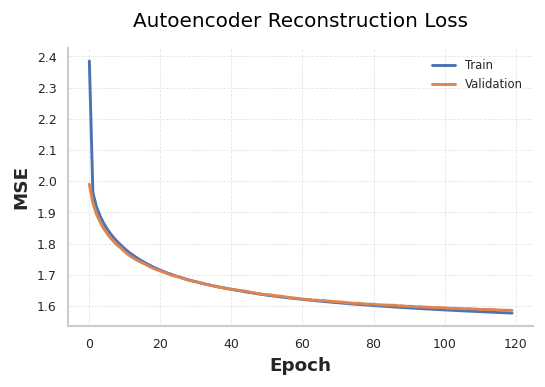

In [85]:
# Plot training and validation loss scores
# against the number of epochs.
plt.figure(figsize=(5, 3))
plt.plot(history_prellin_v6.history['Reg_Output_rmse'], label='Train')
plt.plot(history_prellin_v6.history['val_Reg_Output_rmse'], label='Validation')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')
plt.show()

###### Forecast

In [86]:
latent_representation_v6 = latent_model_prellin_v6.predict([valid_1,valid_0], batch_size=512)
latent_representation_train_v6 = latent_model_prellin_v6.predict([train_1,train_0], batch_size=512)

2046/2046 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
8181/8181 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


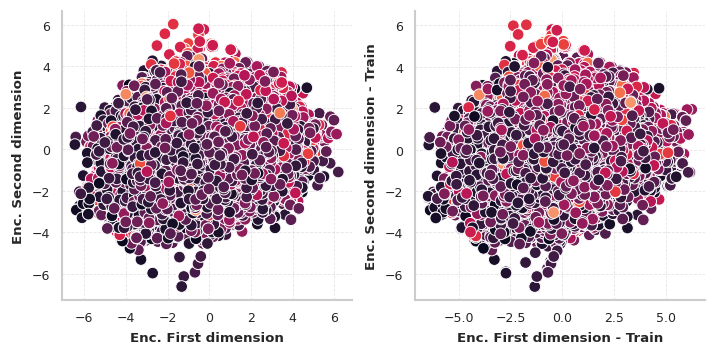

In [87]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v6[:,0],
                y=latent_representation_v6[:,1],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v6[:,0],
                y=latent_representation_train_v6[:,1],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Enc. First dimension", fontsize=8)
axs[0].set_ylabel("Enc. Second dimension", fontsize=8)

axs[1].set_xlabel("Enc. First dimension - Train", fontsize=8)
axs[1].set_ylabel("Enc. Second dimension - Train", fontsize=8)

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

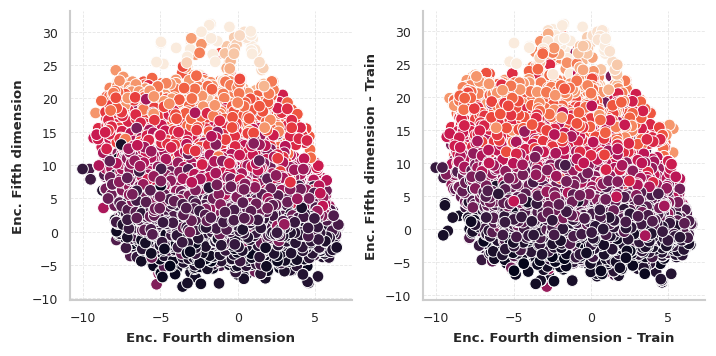

In [88]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v6[:,6],
                y=latent_representation_v6[:,7],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v6[:,6],
                y=latent_representation_train_v6[:,7],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Enc. Fourth dimension", fontsize=8)
axs[0].set_ylabel("Enc. Fifth dimension", fontsize=8)

axs[1].set_xlabel("Enc. Fourth dimension - Train", fontsize=8)
axs[1].set_ylabel("Enc. Fifth dimension - Train", fontsize=8)

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [89]:
latent_representation_v6_final = latent_model_prellin_v6.predict([X_enc_1,X_enc_0], batch_size=512)
latent_representation_v6_final_test = latent_model_prellin_v6.predict([X_enc_test_1,X_enc_test_0], batch_size=128)

10226/10226 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [90]:
X_enc.shape

(5235699, 102)

In [91]:
latent_representation_v6_final.shape

(5235699, 8)

In [92]:
df_train["enc_01_v6"] = latent_representation_v6_final[:,0]
df_train["enc_02_v6"] = latent_representation_v6_final[:,1]
df_train["enc_03_v6"] = latent_representation_v6_final[:,2]
df_train["enc_04_v6"] = latent_representation_v6_final[:,3]
df_train["enc_05_v6"] = latent_representation_v6_final[:,4]
df_train["enc_06_v6"] = latent_representation_v6_final[:,5]
df_train["enc_07_v6"] = latent_representation_v6_final[:,6]
df_train["enc_08_v6"] = latent_representation_v6_final[:,7]

df_test["enc_01_v6"] = latent_representation_v6_final_test[:,0]
df_test["enc_02_v6"] = latent_representation_v6_final_test[:,1]
df_test["enc_03_v6"] = latent_representation_v6_final_test[:,2]
df_test["enc_04_v6"] = latent_representation_v6_final_test[:,3]
df_test["enc_05_v6"] = latent_representation_v6_final_test[:,4]
df_test["enc_06_v6"] = latent_representation_v6_final_test[:,5]
df_test["enc_07_v6"] = latent_representation_v6_final_test[:,6]
df_test["enc_08_v6"] = latent_representation_v6_final_test[:,7]

In [93]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum(), df_train.shape, df_test.shape

(0, 3644, (5235699, 218), (3644, 218))

##### STORE ENCODED FEATURES from Model 6:

In [94]:
df_train.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v6_ext_final.csv")
df_test.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v6_ext_final.csv")

# df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v6.csv", index_col=0)
# df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v6.csv", index_col=0)

##### Test Correlations:

In [95]:
df_train[['PC_1', 'PC_2', 'PC_3', 'enc_01_v6', 'enc_02_v6', 'enc_03_v6','enc_04_v6','enc_05_v6',
          'enc_06_v6','enc_07_v6','enc_08_v6',"bg+1:00"]].corr().style.background_gradient(cmap='viridis')

,PC_1,PC_2,PC_3,enc_01_v6,enc_02_v6,enc_03_v6,enc_04_v6,enc_05_v6,enc_06_v6,enc_07_v6,enc_08_v6,bg+1:00
PC_1,1.000000,-0.000000,-0.000000,-0.052834,0.094037,-0.190916,-0.754596,-0.649992,-0.359644,-0.584530,0.658004,0.459282
PC_2,-0.000000,1.000000,-0.000000,0.376507,0.560234,0.566378,-0.027971,-0.031329,-0.216160,0.047753,0.602971,0.337899
PC_3,-0.000000,-0.000000,1.000000,0.231693,-0.134397,-0.166056,0.037857,-0.248482,-0.132525,0.126973,0.083701,0.225452
enc_01_v6,-0.052834,0.376507,0.231693,1.000000,0.004192,0.148860,0.018454,0.251379,0.091663,-0.110348,0.150688,0.111875
enc_02_v6,0.094037,0.560234,-0.134397,0.004192,1.000000,-0.096858,-0.169095,-0.161114,0.048315,0.028781,0.361118,0.180449
enc_03_v6,-0.190916,0.566378,-0.166056,0.148860,-0.096858,1.000000,-0.048968,0.145055,0.034630,0.221875,0.182865,0.045245
enc_04_v6,-0.754596,-0.027971,0.037857,0.018454,-0.169095,-0.048968,1.000000,0.460780,0.120359,0.034250,-0.467276,-0.295991
enc_05_v6,-0.649992,-0.031329,-0.248482,0.251379,-0.161114,0.145055,0.460780,1.000000,0.045889,0.357633,-0.473534,-0.377088
enc_06_v6,-0.359644,-0.216160,-0.132525,0.091663,0.048315,0.034630,0.120359,0.045889,1.000000,-0.021999,-0.447948,-0.295298
enc_07_v6,-0.584530,0.047753,0.126973,-0.110348,0.028781,0.221875,0.034250,0.357633,-0.021999,1.000000,-0.345567,-0.254779


##### Submission Model 6:

In [96]:
recons, pred = autoencoder_prellin_v6.predict([X_enc_test_1,X_enc_test_0])
_, pred_train = autoencoder_prellin_v6.predict([X_enc_1,X_enc_0], batch_size=512)

114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
10226/10226 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step


In [97]:
# df_train_scaled=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)
# df_test.shape

In [98]:
# target_scaler = StandardScaler()
# target_scaler.fit(df_train_scaled["bg+1:00"].values.reshape(-1, 1))

In [99]:
# pred_resc = target_scaler.inverse_transform(pred.reshape(-1,1))
# pred_resc_train = target_scaler.inverse_transform(pred_train.reshape(-1,1))

In [100]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")
sub.shape

(3644, 2)

In [101]:
sub["bg+1:00"] = pred
pred_resc_train = pd.DataFrame(data=pred_train, index=df_train.index, columns=["bg+1:00"])

In [102]:
sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_encoder_v6_ext_final.csv", index=False)
pred_resc_train.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/train_encoder_v6_ext_final.csv")

In [103]:
df_train.sample(3)

,p_num,minute,hour,intake_av0,intake_av1,intake_av2,intake_av3,intake_av4,intake_av5,intake_av6,intake_av7,intake_av8,intake_av9,intake_av10,intake_av11,intake_av12,intake_av13,intake_av14,intake_av15,intake_av16,intake_av17,intake_av18,intake_av19,intake_av20,intake_av21,intake_av22,intake_av23,intake_av24,intake_av25,intake_av26,intake_av27,intake_av28,intake_av29,intake_av30,intake_av31,bg0,bg1,bg2,bg3,bg4,bg5,bg6,bg7,bg8,bg9,bg10,bg11,bg12,bg13,bg14,...,insulin_av5,insulin_av6,insulin_av7,insulin_av8,insulin_av9,insulin_av10,insulin_av11,insulin_av12,insulin_av13,insulin_av14,insulin_av15,insulin_av16,insulin_av17,insulin_av18,insulin_av19,insulin_av20,insulin_av21,insulin_av22,insulin_av23,insulin_av24,insulin_av25,insulin_av26,insulin_av27,insulin_av28,insulin_av29,insulin_av30,insulin_av31,bg+1:00,mean,std,skew,PC_1,PC_2,PC_3,enc_01_v5,enc_02_v5,enc_03_v5,enc_04_v5,enc_05_v5,enc_06_v5,enc_07_v5,enc_08_v5,enc_01_v6,enc_02_v6,enc_03_v6,enc_04_v6,enc_05_v6,enc_06_v6,enc_07_v6,enc_08_v6
2713326,p06,0,4,-0.952975,-0.939579,-0.943589,-0.978533,-0.996496,-1.008683,-0.986232,-0.960604,-0.904746,-0.881555,-0.863000,-0.885126,-0.896715,-0.899039,-0.892234,-0.866310,-0.846819,-0.848129,-0.895032,-0.913940,-0.940064,-0.967644,-1.006270,-1.012626,-1.008438,-1.025256,-1.026082,-1.029102,-1.053579,-1.091804,-1.108833,-1.116727,0.270386,0.203925,0.137444,0.037630,-0.028915,-0.128791,-0.262008,-0.361925,-0.461889,-0.528556,-0.628519,-0.661887,-0.728590,-0.761926,-0.761980,...,-0.112659,-0.137150,-0.159540,-0.180030,-0.199563,-0.218065,-0.235568,-0.252306,-0.268340,-0.283718,-0.298781,-0.313323,-0.327321,-0.327321,-0.327336,-0.327354,-0.327368,-0.327402,-0.327433,-0.327463,-0.327508,-0.327546,-0.327580,-0.327632,-0.327681,-0.327726,-0.327789,6.0,9.774856,4.585136,0.795449,-3.182879,-1.469175,0.784889,0.012417,-0.039183,0.019260,0.021615,-0.096279,0.222202,-0.034201,-0.125915,-0.471317,-0.324698,0.103696,-0.256002,-0.017456,0.303024,2.019151,-0.635412
3152248,p10,50,16,-1.872188,-1.996837,-1.870979,-1.924829,-1.971139,-1.786102,-1.514413,-1.328839,-1.034471,-0.918891,-0.815579,-0.864780,-1.072845,-1.147826,-1.189786,-1.267123,-1.254229,-1.060549,-1.059424,-0.790571,-0.785257,-0.938909,-1.075572,-0.314502,-0.632450,-0.922648,-0.985114,-0.881996,-0.580059,-0.899634,-0.596780,-0.398206,-1.227366,-1.160883,-1.027844,-0.928033,-0.828149,-0.794912,-0.728354,-0.595112,-0.528522,-0.495236,-0.428591,-0.295318,-0.361988,-0.561957,-0.728650,...,-0.748216,-0.690291,-0.669550,-0.629009,-0.610164,-0.610438,-0.613070,-0.594349,-0.602096,-0.626423,-0.741423,-0.847253,-0.966332,-0.976734,-0.984820,-0.887907,-0.887911,-0.887941,-0.063837,-0.063871,-0.063918,-0.063959,-0.064000,-0.064056,-0.064111,-0.064163,-0.064229,6.2,6.806159,1.568559,0.363493,-4.079550,0.300313,-0.438609,-0.109781,0.078203,0.128605,0.009556,-0.181165,0.263010,-0.030091,-0.088005,-0.856546,-0.458433,1.808773,-0.316714,1.043041,0.222314,2.174490,0.570780
2078454,p04,5,2,0.887101,0.810102,0.758006,0.721104,0.695855,0.676236,0.664532,0.658276,0.654337,0.652182,0.648728,0.644221,0.639603,0.635294,0.631222,0.627606,0.624246,0.620918,0.617961,0.615110,0.612545,0.610153,0.607879,0.605973,0.603856,0.601772,0.599755,0.597803,0.595902,0.593952,0.592092,0.590358,-0.661548,-0.461835,-0.361965,-0.361955,-0.328628,-0.295321,-0.195388,-0.162050,-0.062092,-0.095395,-0.261984,-0.261993,-0.195351,0.004621,0.071285,...,-0.356736,-0.377298,-0.366208,-0.286527,-0.127103,-0.081897,-0.100244,-0.163400,-0.200030,-0.336834,-0.216423,-0.150009,-0.169881,-0.121835,-0.102735,-0.122705,-0.175729,-0.250354,-0.272804,-0.409574,-0.474587,-0.589953,-0.665566,-0.622595,-0.464739,-0.238275,-0.112648,8.2,8.672853,2.098436,0.402062,-1.285643,0.318525,0.024219,-0.025147,-0.027743,0.007680,0.020537,-0.089035,0.511380,0.068341,-0.006922,0.558787,-0.666587,0.179309,0.702376,1.111995,-0.381198,-1.059749,3.533373


#### MODEL 7 - Convol + Intake / 10 latent dimensions

In [ ]:
cols_bg = ['bg0','bg1','bg2','bg3','bg4','bg5','bg6','bg7','bg8','bg9','bg10','bg11','bg12','bg13','bg14',
           'bg15','bg16','bg17','bg18','bg19','bg20','bg21','bg22','bg23','bg24','bg25','bg26','bg27','bg28',
           'bg29','bg30','bg31']

cols_brake = ['brake0','brake1','brake2','brake3','brake4','brake5','brake6','brake7','brake8','brake9','brake10','brake11','brake12','brake13',
              'brake14','brake15','brake16','brake17','brake18','brake19','brake20','brake21','brake22','brake23','brake24','brake25','brake26',
              'brake27','brake28','brake29','brake30','brake31']

cols_intake = ['intake0','intake1','intake2','intake3','intake4','intake5','intake6','intake7','intake8','intake9',
               'intake10','intake11','intake12','intake13','intake14','intake15','intake16','intake17','intake18',
               'intake19','intake20','intake21','intake22','intake23','intake24','intake25','intake26','intake27',
               'intake28','intake29','intake30','intake31']

In [ ]:
X_enc = df_train[["p_num"]+cols_bg+cols_brake+cols_intake]
y_enc = df_train["bg+1:00"]
X_enc_test = df_test[cols_bg+cols_brake+cols_intake]
X_enc.shape, X_enc_test.shape

In [ ]:
X_enc.isnull().sum().sum(), y_enc.isna().sum()
#y_enc[:10]

In [ ]:
X_enc_train, X_enc_valid, y_enc_train, y_enc_valid = train_test_split(X_enc, y_enc, test_size=0.2, random_state=42, stratify=X_enc["p_num"])

X_enc_train.drop(["p_num"], axis=1, inplace=True)
X_enc_valid.drop(["p_num"], axis=1, inplace=True)
X_enc.drop(["p_num"], axis=1, inplace=True)

X_enc_train.shape, X_enc_valid.shape, X_enc.shape, y_enc_train.shape, y_enc_valid.shape, y_enc.shape

In [ ]:
# Assuming your data is in a NumPy array called 'data'
train = X_enc_train.values.reshape((-1, 32, 3))  # Reshape for LSTM
valid = X_enc_valid.values.reshape((-1, 32, 3))
X_enc = X_enc.values.reshape((-1, 32, 3))
X_enc_test = X_enc_test.values.reshape((-1, 32, 3))

y_enc_train = y_enc_train.values.reshape((-1, 1))
y_enc_valid = y_enc_valid.values.reshape((-1, 1))

In [ ]:
def dense_block(cells, dropout=0.3,activation="selu", reg=0.0, name=None):
  if activation == "selu":
    block = keras.Sequential(name=name)
    block.add(Dense(cells,
                    activity_regularizer=keras.regularizers.l1(reg),
                    name=f"{name}_dense",
                    kernel_initializer="lecun_normal"))
    block.add(layers.BatchNormalization(name=f"{name}_bn"))
    block.add(layers.Activation(activation, name=f"{name}_activ"))
    block.add(layers.AlphaDropout(dropout, name=f"{name}_do_alpha"))

  else:
    block = keras.Sequential(name=name)
    block.add(Dense(cells,
                    activity_regularizer=keras.regularizers.l1(reg),
                    name=f"{name}_dense",
                    kernel_initializer="he_normal"))
    block.add(layers.BatchNormalization(name=f"{name}_bn"))
    block.add(layers.Activation(activation, name=f"{name}_activ"))
    block.add(layers.Dropout(dropout, name=f"{name}_do"))

  return block


def model_autoencoder_v7():
  input_dim = 32
  latent_vec_dim = 10

  # 2. Build the autoencoder model
  input_ts = keras.Input(shape=(input_dim, 3))

  # Encoder
  x = layers.GaussianNoise(stddev=0.1, seed=42)(input_ts)
  x = layers.Dropout(0.1)(x)
  x = layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.MaxPooling1D(pool_size=2)(x)
  x = layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.MaxPooling1D(pool_size=2)(x)
  x = layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.MaxPooling1D(pool_size=2)(x)
  x = layers.Flatten()(x)
  encoded = layers.Dense(latent_vec_dim, activation='linear', kernel_regularizer = tf.keras.regularizers.L2(l2=0.1))(x)  # Bottleneck layer with 5 dimensions

  output_1 = Dense(1, activation='linear', name="Reg_Output")(encoded)

  #encoder = encoded

  # Decoder
  x = layers.Dense(4 * 32)(encoded)  # Adjusted output size
  x = layers.Reshape((4, 32))(x)  # Adjusted reshape
  x = layers.Conv1DTranspose(filters=32, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.UpSampling1D(size=2)(x)
  x = layers.Conv1DTranspose(filters=64, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.UpSampling1D(size=2)(x)
  x = layers.Conv1DTranspose(filters=128, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.UpSampling1D(size=2)(x)
  decoded = layers.Conv1D(filters=3, kernel_size=3, activation='linear', padding='same', name="decoded")(x)

  # Connect both encoder and decoder
  autoencoder_mult = Model(inputs = input_ts, outputs = [decoded, output_1], name="Deep_Autoencoder")

  # Latent representation (Optional)
  latent_model = Model(input_ts, encoded)

  return autoencoder_mult, latent_model

In [ ]:
autoencoder_prellin_v7, latent_model_prellin_v7 = model_autoencoder_v7()

# Get summary
autoencoder_prellin_v7.summary()

In [ ]:
lr = keras.callbacks.ReduceLROnPlateau(monitor="val_Reg_Output_rmse",
                        factor=0.75,
                        patience=10,
                        verbose=1,
                        mode="min")

early_stop = keras.callbacks.EarlyStopping(monitor="val_Reg_Output_rmse",
                            patience=25,
                            verbose=1,
                            mode="min",
                            restore_best_weights=True)


##################################################################### Relevant Folders
folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Glucose/encoder_07_ext_bis/"
##################################################################### Generate and Fit Model
# Callbacks:
checkpoint_filepath = folders_experiment + f'checkpoint/best_weights_v7.weights.h5'

Checkpoint = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                 save_weights_only=True,
                                                 monitor="val_Reg_Output_rmse",
                                                 mode='min')

In [ ]:
# Compile the autoencoder model
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
loss_0 = 'mse'
loss_1 = 'mse'

autoencoder_prellin_v7.compile(loss=[loss_0, loss_1], loss_weights=[0.6,0.40], optimizer=optimizer, metrics={'decoded': 'mse','Reg_Output': RootMeanSquaredError(name="rmse")})

# Train the autoencoder with MNIST data
history_prellin_v7 = autoencoder_prellin_v7.fit(train, [train, y_enc_train], epochs=141, batch_size=256, callbacks = [early_stop, Checkpoint, lr],
                                                 shuffle=True, validation_data=(valid, [valid, y_enc_valid]))

autoencoder_prellin_v7.load_weights(checkpoint_filepath)

In [ ]:
# Plot training and validation loss scores
# against the number of epochs.
plt.figure(figsize=(5, 3))
plt.plot(history_prellin_v7.history['loss'], label='Train')
plt.plot(history_prellin_v7.history['val_loss'], label='Validation')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')
plt.show()

In [ ]:
latent_representation_v7 = latent_model_prellin_v7.predict(valid, batch_size=512)
latent_representation_train_v7 = latent_model_prellin_v7.predict(train, batch_size=512)

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v7[:,0],
                y=latent_representation_v7[:,1],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v7[:,0],
                y=latent_representation_train_v7[:,1],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Enc. First dimension", fontsize=8)
axs[0].set_ylabel("Enc. Second dimension", fontsize=8)

axs[1].set_xlabel("Enc. First dimension - Train", fontsize=8)
axs[1].set_ylabel("Enc. Second dimension - Train", fontsize=8)

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v7[:,5],
                y=latent_representation_v7[:,6],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v7[:,5],
                y=latent_representation_train_v7[:,6],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Enc. First dimension", fontsize=8)
axs[0].set_ylabel("Enc. Third dimension", fontsize=8)

axs[1].set_xlabel("Enc. First dimension - Train", fontsize=8)
axs[1].set_ylabel("Enc. Third dimension - Train", fontsize=8)

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
latent_representation_v7_final = latent_model_prellin_v7.predict(X_enc, batch_size=512)
latent_representation_v7_final_test = latent_model_prellin_v7.predict(X_enc_test, batch_size=512)

In [ ]:
X_enc.shape

In [ ]:
latent_representation_v7_final.shape

In [ ]:
df_train["enc_01_v7"] = latent_representation_v7_final[:,0]
df_train["enc_02_v7"] = latent_representation_v7_final[:,1]
df_train["enc_03_v7"] = latent_representation_v7_final[:,2]
df_train["enc_04_v7"] = latent_representation_v7_final[:,3]
df_train["enc_05_v7"] = latent_representation_v7_final[:,4]
df_train["enc_06_v7"] = latent_representation_v7_final[:,5]
df_train["enc_07_v7"] = latent_representation_v7_final[:,6]
df_train["enc_08_v7"] = latent_representation_v7_final[:,7]
df_train["enc_09_v7"] = latent_representation_v7_final[:,8]
df_train["enc_10_v7"] = latent_representation_v7_final[:,9]

df_test["enc_01_v7"] = latent_representation_v7_final_test[:,0]
df_test["enc_02_v7"] = latent_representation_v7_final_test[:,1]
df_test["enc_03_v7"] = latent_representation_v7_final_test[:,2]
df_test["enc_04_v7"] = latent_representation_v7_final_test[:,3]
df_test["enc_05_v7"] = latent_representation_v7_final_test[:,4]
df_test["enc_06_v7"] = latent_representation_v7_final_test[:,5]
df_test["enc_07_v7"] = latent_representation_v7_final_test[:,6]
df_test["enc_08_v7"] = latent_representation_v7_final_test[:,7]
df_test["enc_09_v7"] = latent_representation_v7_final_test[:,8]
df_test["enc_10_v7"] = latent_representation_v7_final_test[:,9]

In [ ]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum(), df_train.shape, df_test.shape

##### STORE ENCODED FEATURES from Model 7:

In [ ]:
df_train.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v7_ext.csv")
df_test.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v7_ext.csv")

#df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v7_ext.csv", index_col=0)
#df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v7_ext.csv", index_col=0)

##### Test Correlations:

In [ ]:
df_train[['PC_1', 'PC_2', 'PC_3', 'enc_01_v7', 'enc_02_v7', 'enc_03_v7','enc_04_v7','enc_05_v7',
          'enc_06_v7','enc_07_v7','enc_08_v7',"bg+1:00"]].corr().style.background_gradient(cmap='viridis')

##### Submission Model 7:

In [ ]:
recons, pred = autoencoder_prellin_v7.predict(X_enc_test, batch_size=512)
_, pred_train = autoencoder_prellin_v7.predict(X_enc, batch_size=512)

In [ ]:
df_train_scaled=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)
df_test.shape

In [ ]:
target_scaler = StandardScaler()
target_scaler.fit(df_train_scaled["bg+1:00"].values.reshape(-1, 1))

In [ ]:
pred_resc = target_scaler.inverse_transform(pred.reshape(-1,1))
pred_resc_train = target_scaler.inverse_transform(pred_train.reshape(-1,1))

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")
sub.shape

In [ ]:
sub["bg+1:00"] = pred_resc
pred_resc_train = pd.DataFrame(data=pred_resc_train, index=df_train.index, columns=["bg+1:00"])

In [ ]:
sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_encoder_v7_ext.csv", index=False)
pred_resc_train.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/train_encoder_v7_ext.csv")

## Encoded Features Analysis:

In [ ]:
new_features = [ 'p_num','bg+1:00', 'cluster', 'PC_1', 'PC_2', 'PC_3', 'PC_4',  'enc_01_v5', 'enc_02_v5', 'enc_03_v5', 'enc_04_v5',
 'enc_05_v5', 'enc_06_v5', 'enc_07_v5', 'enc_08_v5', 'enc_01_v6', 'enc_02_v6', 'enc_03_v6', 'enc_04_v6', 'enc_05_v6', 'enc_06_v6', 'enc_07_v6',
 'enc_08_v6', 'enc_01_v7', 'enc_02_v7', 'enc_03_v7', 'enc_04_v7', 'enc_05_v7', 'enc_06_v7', 'enc_07_v7', 'enc_08_v7', 'enc_09_v7', 'enc_10_v7']

In [ ]:
#list_columns_final = list(df_train.columns)
#new_features = list_columns_final[:4]+list_columns_final[-50:]+["bg-0:00"]
#new_features_test = list_columns_final[:4]+list_columns_final[-49:]+["bg-0:00"]
#print(new_features_test)
#new_features_test = new_features.remove("bg+1:00")
new_features_df = df_train[new_features]
new_features_df_test = df_test[new_features]
new_features_df_test.shape,new_features_df.shape

In [ ]:
col_to_use = ['enc_01_v5', 'enc_02_v5', 'enc_03_v5','enc_04_v5', 'enc_05_v5', 'enc_06_v5', 'enc_07_v5', 'enc_08_v5']

df_train_5 = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v5_ext.csv", usecols=col_to_use)
df_test_5 = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v5_ext.csv", usecols=col_to_use)

In [ ]:
new_features_df[col_to_use] = df_train_5.values
new_features_df_test[col_to_use] = df_test_5.values

new_features_df_test.shape,new_features_df.shape

In [ ]:
new_features_df.drop(columns=['p_num']).corr().style.background_gradient(cmap='viridis')

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=new_features_df["enc_08_v7"],
                y=new_features_df["enc_07_v7"],
                c=new_features_df["bg+1:00"],
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=new_features_df["enc_08_v7"],
                y=new_features_df["enc_05_v5"],
                c=new_features_df["bg+1:00"],
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("enc_08_v6", fontsize=8)
axs[0].set_ylabel("enc_07_v7", fontsize=8)

axs[1].set_xlabel("enc_08_v6", fontsize=8)
axs[1].set_ylabel("enc_05_v5", fontsize=8)

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### **FEATURES SELECTIONS**

In [ ]:
X = new_features_df.drop(["p_num","cluster","bg+1:00"], axis=1)
y = new_features_df["bg+1:00"]

In [ ]:
X.isna().sum().sum(), y.isna().sum(), new_features_df_test.isna().sum().sum()

##### **Select K-Best**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Separate features (X) and target variable (y)

X_test_lasso = new_features_df_test.drop(["p_num", "cluster","bg+1:00"], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform feature selection with cross-validation
k_best = 12
selector = SelectKBest(score_func=f_regression, k=k_best)
X_train_selected = selector.fit_transform(X_train, y_train)
selected_feature_indices = selector.get_support(indices=True)
X_test_selected = selector.transform(X_test)

# Train and evaluate a regression model with the selected features
model = LinearRegression()

# Perform cross-validation on the training data with selected features
cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Print cross-validation scores (RMSE)
print("Cross-validation RMSE scores:", -cv_scores)  # Negate to get positive RMSE values
print("Average cross-validation RMSE score:", -cv_scores.mean())

# Train the model on the full training data with selected features
model.fit(X_train_selected, y_train)

# Predict on the test data
y_pred = model.predict(X_test_selected)

# Calculate RMSE on the test data
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False for RMSE
print("Test RMSE:", rmse)

In [ ]:
X.columns[selected_feature_indices]

##### LassoCV:

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature selection with cross-validation using LassoCV
model = LassoCV(cv=5, random_state=42)  # 5-fold cross-validation
model.fit(X_train, y_train)

# Get the selected features
selected_feature_indices = model.coef_ != 0
X_train_selected = X_train.loc[:, selected_feature_indices]
X_test_selected = X_test.loc[:, selected_feature_indices]

# Print the number of selected features
print("Number of selected features:", sum(selected_feature_indices))

# Evaluate the model with cross-validation
cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Print cross-validation scores (RMSE)
print("Cross-validation RMSE scores:", -cv_scores)
print("Average cross-validation RMSE score:", -cv_scores.mean())

# Predict on the test data
y_pred = model.predict(X_test)

y_test_pred = model.predict(X_test_lasso)

# Calculate RMSE on the test data
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE:", rmse)

In [ ]:
selected_features_final = X.columns[selected_feature_indices]
selected_features_final

In [ ]:
new_feat = ['enc_01_v6', 'enc_03_v6', 'enc_04_v6','enc_06_v6',
            'enc_08_v6', 'enc_04_v7', 'enc_05_v7', 'enc_06_v7',
            'enc_07_v7','enc_01_v1','enc_05_v4', 'enc_01_v4']

new_feat = ['p_num','PC_1', 'PC_2', 'PC_3', 'PC_4', 'enc_08_v6', 'enc_07_v7', 'enc_03_v7', 'enc_01_v5', 'enc_02_v5', 'enc_03_v5','enc_04_v5', 'enc_05_v5', 'enc_06_v5', 'enc_07_v5', 'enc_08_v5','bg+1:00']

#new_feat = list(set(new_feat))

df_train.head()

##### 3.0 RFE

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Recursive Feature Elimination (RFE) with cross-validation
estimator = LinearRegression()
selector = RFECV(estimator, step=1, cv=5, scoring='neg_root_mean_squared_error')
selector = selector.fit(X_train, y_train)

# Get the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Print the number of selected features
print("Number of features selected by RFE:", selector.n_features_)

# Evaluate the model with cross-validation
cv_scores = cross_val_score(estimator, X_train_selected, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Print cross-validation scores (RMSE)
print("Cross-validation RMSE scores (RFE):", -cv_scores)
print("Average cross-validation RMSE score (RFE):", -cv_scores.mean())

# Train the model on the full training data with selected features
estimator.fit(X_train_selected, y_train)

# Predict on the test data
y_pred = estimator.predict(X_test_selected)

# Calculate RMSE on the test data
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE (RFE):", rmse)

In [ ]:
selector.ranking_
selector.get_feature_names_out()

In [ ]:
X.head()
#X_train_selected.shape, X.shape

##### Update Dataset:

In [ ]:
# df_train_original = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster.csv", index_col=0)
# df_test_original = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster.csv", index_col=0)

# df_train_original.head()

In [ ]:
df_train_final = df_train.loc[:,new_feat]
df_test_final = df_test.loc[:,new_feat]

In [ ]:
df_train_final[col_to_use] = df_train_5.values
df_test_final[col_to_use] = df_test_5.values

df_train_final.shape,df_test_final.shape

In [ ]:
df_train_final.shape, df_test_final.shape,df_train.shape, df_test.shape

In [ ]:
df_train_final["bg+1:00"] = df_train_scaled["bg+1:00"].values

In [ ]:
df_train_final.head()

In [ ]:
df_train_final.describe()

In [ ]:
df_test_final.head()

In [ ]:
df_train_final.iloc[:,-16:].corr().style.background_gradient(cmap='viridis')

In [ ]:
df_test_final.head()

In [ ]:
df_train_scaled["bg+1:00"].shape

In [ ]:
df_train_final.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_final_ext.csv")
df_test_final.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_final_ext.csv")

#df_train_final = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_final.csv", index_col=0)
#df_test_final = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_final.csv", index_col=0)

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v7.csv", index_col=0)
df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v7.csv", index_col=0)

In [ ]:
df_train_final["bg+1:00"].plot()

## Ensemble

In [ ]:
# Load Data:
data_train_dict = dict()
data_test_dict  = dict()
list_files = list()
list_files_test = list()

for z in range(1,8):
  data_train_dict[f"train_{z}"] = pd.read_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/train_encoder_v{z}.csv", index_col=0)
  data_test_dict[f"test_{z}"] = pd.read_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_encoder_v{z}.csv", index_col=0)
  list_files.append(data_train_dict[f"train_{z}"])
  list_files_test.append(data_test_dict[f"test_{z}"])

In [ ]:
data_test_dict.keys()
len(list_files_test)

In [ ]:
all_train_forecast = pd.concat(list_files, axis=1, join="inner")
list_files_test = pd.concat(list_files_test, axis=1, join="inner")
all_train_forecast.columns = list(data_train_dict.keys())
list_files_test.columns = list(data_test_dict.keys())

all_train_forecast["target"] = df_train["bg+1:00"]
all_train_forecast.head()

In [ ]:
all_train_forecast = pd.concat(list_files, axis=1, join="inner")
list_files_test = pd.concat(list_files_test, axis=1, join="inner")
all_train_forecast.columns = list(data_train_dict.keys())
list_files_test.columns = list(data_test_dict.keys())

all_train_forecast["target"] = df_train["bg+1:00"]
all_train_forecast.head()

In [ ]:
# g = sns.PairGrid(all_train_forecast,
#                  hue="target",
#                  palette="viridis",
#                  height=2.5,
#                  aspect=1, layout_pad=0.5,
#                  despine=True,
#                  dropna=False,
#                  vars=["train_1", "train_2", "train_3", "train_4",
#                             "train_5", "train_6", "train_7"],
#                   corner=True)

# g.map_diag(sns.histplot, hue=None)
# g.map_offdiag(sns.scatterplot)
# g.add_legend()
# plt.show()

In [ ]:
y = all_train_forecast["target"]
X = all_train_forecast.drop(columns=["target"])

In [ ]:
p1_val = list(df_train[(df_train["p_num"]=="p01")&(df_train["obv_n"]>=7600)].index)
p2_val = list(df_train[(df_train["p_num"]=="p02")&(df_train["obv_n"]>=22500)].index)
p3_val = list(df_train[(df_train["p_num"]=="p03")&(df_train["obv_n"]>=23000)].index)
p4_val = list(df_train[(df_train["p_num"]=="p04")&(df_train["obv_n"]>=22000)].index)
p5_val = list(df_train[(df_train["p_num"]=="p05")&(df_train["obv_n"]>=7600)].index)
p6_val = list(df_train[(df_train["p_num"]=="p06")&(df_train["obv_n"]>=7600)].index)
p10_val = list(df_train[(df_train["p_num"]=="p10")&(df_train["obv_n"]>=22500)].index)
p11_val = list(df_train[(df_train["p_num"]=="p11")&(df_train["obv_n"]>=22000)].index)
p12_val = list(df_train[(df_train["p_num"]=="p12")&(df_train["obv_n"]>=22500)].index)

matrix_val = p1_val+p2_val+p3_val+p4_val+p5_val+p6_val+p10_val+p11_val+p12_val
len(matrix_val)/df_train.shape[0]

X_train = X.drop(matrix_val)
X_valid = X.loc[matrix_val]
y_train = y.drop(matrix_val)
y_valid = y.loc[matrix_val]

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

##### Ensemble 1: LightGBM

In [ ]:
def rf_objective(trial):
    params = {
            #'num_leaves':         trial.suggest_int('num_leaves', 100, 111, step=1),
            'n_estimators': 1000, #trial.suggest_int('n_estimators', 250, 800),
            #'learning_rate':      0.015, #trial.suggest_loguniform('learning_rate', 0.01, 0.03),
            'objective':          'regression',
            'min_child_samples':  trial.suggest_int('min_child_samples', 21, 101, step=1),
            #'min_child_weight' :  trial.suggest_float("min_child_weight", 1e-2, 0.1, log=True),
            "reg_alpha" :         trial.suggest_float("reg_alpha", 1e-3, 1.0, log=True),
            "reg_lambda" :        trial.suggest_float("reg_lambda", 1e-3, 1.0, log=True),
            "max_depth" :         trial.suggest_int('max_depth', 5, 12, step=1),
            #'bagging_freq' :      trial.suggest_int('bagging_freq', 3, 9),
            #'max_bin' :           trial.suggest_int('max_bin', 401, 501, step=5),
            'colsample_bytree':   trial.suggest_float("colsample_bytree", 0.30, 0.95, step=0.05),
            'subsample':          trial.suggest_float("subsample", 0.70, 0.95, step=0.025),
            "learning_rate" :     0.01,
            'random_state':       42,
            'force_col_wise':     True,
            'device':             "cpu"
            }

  #    if params["bagging_freq"]>0:
  #      params['bagging_fraction'] =  trial.suggest_float("bagging_fraction", 0.75, 0.85, step=0.01)


    optuna_model = LGBMRegressor(**params)

    optuna_model.fit(X_train, y_train, callbacks=[early_stopping(stopping_rounds=51)], eval_set=(X_valid,y_valid) )
    y_pred = optuna_model.predict(X_valid)

    rmse_scores = root_mean_squared_error(y_valid, y_pred)

    return rmse_scores

In [ ]:
rf_study = optuna.create_study(direction = 'minimize', study_name="ens_opt",
                                sampler = optuna.samplers.TPESampler(seed=42),
                                pruner=optuna.pruners.MedianPruner(n_warmup_steps=10)
                                )

In [ ]:
rf_study.optimize(rf_objective, 51, show_progress_bar=True)

In [ ]:
rf_study.best_params

In [ ]:
params =  {'min_child_samples': 78,
          'reg_alpha': 0.3923124608133837,
          'reg_lambda': 0.08736092603745824,
          'max_depth': 5,
          'colsample_bytree': 0.35,
          'subsample': 0.825,
          "learning_rate":0.01,
          'random_state':42,
          'force_col_wise':True,
          'device':"cpu",
          'objective':'regression'}

In [ ]:
model = LGBMRegressor(**params)

model.fit(X_train, y_train, callbacks=[early_stopping(stopping_rounds=51)], eval_metric="rmse", eval_set=(X_valid,y_valid))

In [ ]:
y_final = model.predict(list_files_test)

In [ ]:
df_train_scaled=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)


In [ ]:
df_train_scaled["bg+1:00"].plot()

In [ ]:
target_scaler = StandardScaler()
target_scaler.fit(df_train_scaled["bg+1:00"].values.reshape(-1, 1))

In [ ]:
pred_resc = target_scaler.inverse_transform(y_final.reshape(-1,1))

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")
sub.shape

In [ ]:
sub["bg+1:00"] = pred_resc

In [ ]:
sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_encoder_ensemble.csv", index=False)

In [ ]:
sub["bg+1:00"].plot()

# END

In [ ]:
df_train_final.head()